# G4LumaCam - focusing the lens using optical photons
Tsviki Y. Hirsh

Feb 13th 2025

In [1]:
import lumacam

# Simulate a point source of optical photons

In [2]:
sim = lumacam.Simulate("archive/focus_50mm")
config = lumacam.Config.opticalphoton_point()
config.num_events = 10_000
config.source_position_z = 5
config.position_unit = "cm"
config.direction_z = 1
config.csv_batch_size = 1000
config.max_theta = 3

In [3]:
df = sim.run(config)

Simulating:   0%|          | 0/10000 [00:00<?, ?events/s]

In [30]:
sim = lumacam.Simulate("archive/focus_25mm")
config = lumacam.Config.opticalphoton_point()
config.num_events = 10_000
config.max_theta = 3
config.source_position_z = 5

In [31]:
df = sim.run(config)

Simulating:   0%|          | 0/10000 [00:00<?, ?events/s]

In [32]:
sim = lumacam.Simulate("archive/focus_25mm")
config = lumacam.Config.opticalphoton_point()
config.num_events = 10_000
config.max_theta = 3
config.source_position_z = 2.5

In [33]:
df = sim.run(config)

Simulating:   0%|          | 0/10000 [00:00<?, ?events/s]

# Define a Nikkor lens

In [1]:
import lumacam
lens = lumacam.Lens(archive="archive/focus_50mm")

Loading simulation data:   0%|          | 0/11 [00:00<?, ?it/s]

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


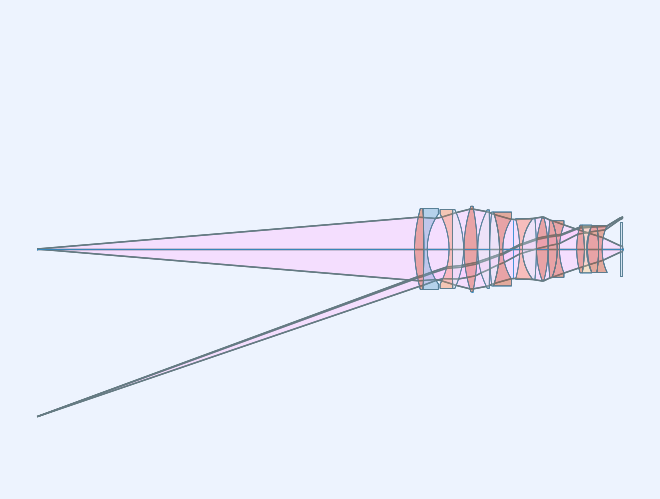

In [6]:
opm = lens.refocus(zfocus=-200)
lens.plot(opm)

# Optimize zfocus

In [2]:
lens.data

,id,parent_id,neutron_id,x,y,z,dx,dy,dz,toa,wavelength,parentName,px,py,pz,parentEnergy,nx,ny,nz,neutronEnergy
0,1,0,1,1.393700,-1.14932,50,0.022017,-0.018156,0.999593,0,413.333,NaN,0,0,0,0,0,0,0,0
1,1,0,6,2.853460,-1.14473,50,0.045063,-0.018078,0.998821,0,413.333,NaN,0,0,0,0,0,0,0,0
2,1,0,53,2.339360,3.07920,50,0.036934,0.048615,0.998134,0,413.333,NaN,0,0,0,0,0,0,0,0
3,1,0,59,-0.715569,2.29596,50,-0.011303,0.036266,0.999278,0,413.333,NaN,0,0,0,0,0,0,0,0
4,1,0,127,2.756140,1.09584,50,0.043528,0.017307,0.998902,0,413.333,NaN,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,1,0,9868,-2.576710,-1.44036,50,-0.040694,-0.022748,0.998913,0,413.333,NaN,0,0,0,0,0,0,0,0
243,1,0,9960,-0.811106,1.77140,50,-0.012813,0.027983,0.999526,0,413.333,NaN,0,0,0,0,0,0,0,0
244,1,0,10021,0.051667,-1.06695,50,0.000816,-0.016857,0.999858,0,413.333,NaN,0,0,0,0,0,0,0,0
245,1,0,10027,0.718781,-1.79391,50,0.011355,-0.028338,0.999534,0,413.333,NaN,0,0,0,0,0,0,0,0


In [3]:
import numpy as np
s = lens.zscan(zfocus_range=np.arange(-2,2,0.5),zfine_range=13.3)

Z-scan (zfocus):   0%|          | 0/8 [00:00<?, ?it/s]

AttributeError: 'NoneType' object has no attribute 'x2'

<Axes: >

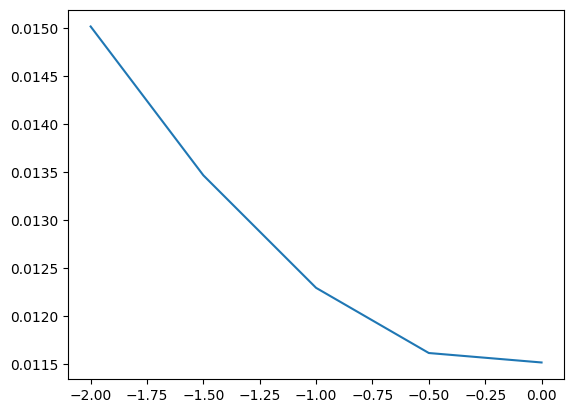

In [8]:
s.plot()

In [4]:
lens = lumacam.Lens(archive="archive/focus_50mm")
s = lens.zscan_optimize(0)

Loading simulation data:   0%|          | 0/11 [00:00<?, ?it/s]

Optimizing zfocus: 0it [00:00, ?it/s]

ValueError: NaN values detected in your input data or the output of your objective/model function - fitting algorithms cannot handle this! Please read https://lmfit.github.io/lmfit-py/faq.html#i-get-errors-from-nan-in-my-fit-what-can-i-do for more information.

In [35]:
s

{'best_zfocus': -85.0748901008709,
 'min_std': 0.3825098477649232,
 'result': <lmfit.minimizer.MinimizerResult at 0x7186d71c3110>}

In [6]:
lens = lumacam.Lens(archive="archive/focus_25mm")
s = lens.zscan_optimize(initial_zfocus=25/1.58,initial_zfine=13,optimize_param="zfine")
s

Optimizing zfine: 0it [00:00, ?it/s]

{'best_zfine': 13.30157797527447,
 'min_std': 0.0075789155196674856,
 'result': <lmfit.minimizer.MinimizerResult at 0x7d50a3ab8b00>}

In [40]:
lens = lumacam.Lens(archive="archive/focus_75mm")
s = lens.zscan_optimize(initial_zfocus=-85.,initial_zfine=2.154,optimize_param="zfocus")
s

Optimizing zfocus: 0it [00:00, ?it/s]

{'best_zfocus': -113.82660094366447,
 'min_std': 0.02389662005349184,
 'result': <lmfit.minimizer.MinimizerResult at 0x7186d7148d60>}

In [41]:
lens = lumacam.Lens(archive="archive/focus_25mm")
s25 = lens.zscan_optimize(initial_zfocus=-85.,initial_zfine=2.154,optimize_param="zfocus")
s25

Optimizing zfocus: 0it [00:00, ?it/s]

{'best_zfocus': -82.38207828117194,
 'min_std': 0.001261366319111494,
 'result': <lmfit.minimizer.MinimizerResult at 0x7186a4f4c3e0>}

In [6]:
lens = lumacam.Lens(archive="archive/focus_50mm")
s50 = lens.zscan_optimize(initial_zfocus=0,initial_zfine=13.3,optimize_param="both")
s50

Loading simulation data: 0it [00:00, ?it/s]

No valid simulation data files found, initializing empty DataFrame.


Optimizing zfocus: 0it [00:00, ?it/s]

TypeError: Lens.trace_rays() got multiple values for argument 'join'

In [42]:
import numpy as np
lens = lumacam.Lens(archive="archive/focus_25mm")
Δ = 1
s2 = lens.zscan(zfocus_range=s25["best_zfocus"],zfine_range=np.linspace(2.154-Δ,2.154+Δ,13))

Z-scan (zfine):   0%|          | 0/13 [00:00<?, ?it/s]

<Axes: >

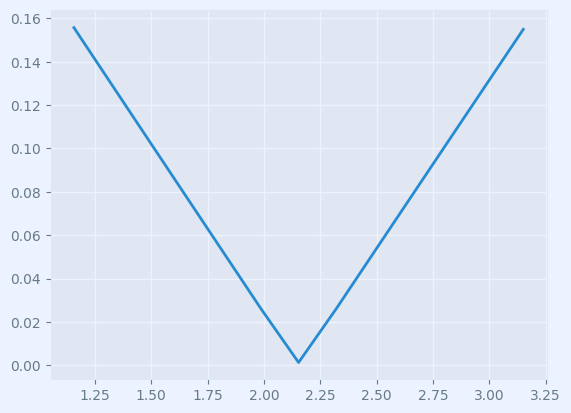

In [44]:
s2.plot()

In [3]:
import numpy as np
for focus in np.arange(0,51,5):
    sim = lumacam.Simulate(f"archive/focus_{focus}mm")
    config = lumacam.Config.opticalphoton_point()
    config.num_events = 10_000
    config.source_position_z = focus + 1e-6
    config.position_unit = "mm"
    config.direction_z = 1
    config.max_theta = 3
    df = sim.run(config)

Simulating:   0%|          | 0/10000 [00:00<?, ?events/s]

Simulating:   0%|          | 0/10000 [00:00<?, ?events/s]

Simulating:   0%|          | 0/10000 [00:00<?, ?events/s]

Simulating:   0%|          | 0/10000 [00:00<?, ?events/s]

Simulating:   0%|          | 0/10000 [00:00<?, ?events/s]

Simulating:   0%|          | 0/10000 [00:00<?, ?events/s]

Simulating:   0%|          | 0/10000 [00:00<?, ?events/s]

Simulating:   0%|          | 0/10000 [00:00<?, ?events/s]

Simulating:   0%|          | 0/10000 [00:00<?, ?events/s]

Simulating:   0%|          | 0/10000 [00:00<?, ?events/s]

Simulating:   0%|          | 0/10000 [00:00<?, ?events/s]

In [1]:
import lumacam
import numpy as np
focus_results = {}
for focus in np.arange(0,51,5):
    lens = lumacam.Lens(archive=f"archive/focus_{focus}mm")
    focus_results[focus] = lens.zscan_optimize(initial_zfocus=0.,initial_zfine=13.3,optimize_param="zfocus")
    

Optimizing zfocus: 0it [00:00, ?it/s]

Optimizing zfocus: 0it [00:00, ?it/s]

Optimizing zfocus: 0it [00:00, ?it/s]

Optimizing zfocus: 0it [00:00, ?it/s]

Optimizing zfocus: 0it [00:00, ?it/s]

Optimizing zfocus: 0it [00:00, ?it/s]

Optimizing zfocus: 0it [00:00, ?it/s]

Optimizing zfocus: 0it [00:00, ?it/s]

Optimizing zfocus: 0it [00:00, ?it/s]

Optimizing zfocus: 0it [00:00, ?it/s]

Optimizing zfocus: 0it [00:00, ?it/s]

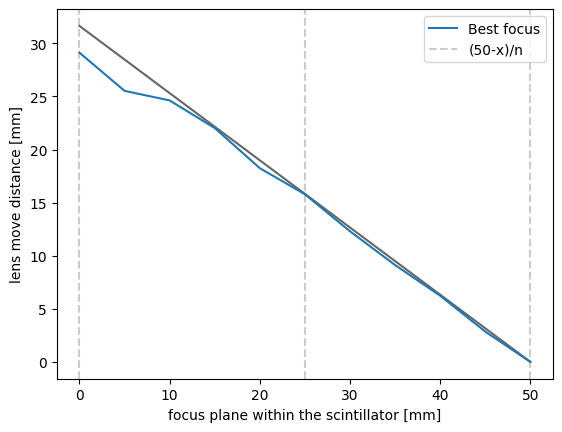

In [7]:
import pandas
import matplotlib.pyplot as plt
pandas.DataFrame(focus_results).T[["best_zfocus","min_std"]].plot(y="best_zfocus")
plt.ylabel("lens move distance [mm]")
plt.xlabel("focus plane within the scintillator [mm]")
plt.axvline(0,ls="--",color="0.8",zorder=-1)
plt.axvline(25,ls="--",color="0.8",zorder=-1)
plt.axvline(50,ls="--",color="0.8",zorder=-1)
x = np.linspace(0,50,100)
y = (50-x)/1.58
plt.plot(x,y,color="0.4",zorder=-1)
plt.legend(["Best focus", "(50-x)/n"])


In [8]:
focus_results[25]

{'best_zfocus': 15.789376493309133,
 'min_std': 0.007582083974076329,
 'result': <lmfit.minimizer.MinimizerResult at 0x7512e15742b0>}

In [4]:
50/1.58

31.645569620253163

# uniform neutrons


In [9]:
import lumacam

In [2]:
sim = lumacam.Simulate("archive/testing")
config = lumacam.Config.neutrons_uniform_energy()
config.num_events = 2_000
config.source_position_z = -1590
config.energy_min = 1
config.max_theta = 0
config.csv_batch_size = 10_000
config.sample_material = "G4_Galactic"

In [4]:
df = sim.run(config,verbosity=2)

Simulating:   0%|          | 0/2000 [00:00<?, ?events/s]

**************************************************************
Geant4 version Name: geant4-10-06-patch-02    (29-May-2020)
Copyright : Geant4 Collaboration
References : NIM A 506 (2003), 250-303
: IEEE-TNS 53 (2006), 270-278
: NIM A 835 (2016), 186-225
WWW : http://geant4.org/
**************************************************************
<<< Geant4 Physics List simulation engine: QGSP_BERT_HP
/cvmfs/oasis.opensciencegrid.org/jlab/geant4/ubuntu24-gcc13/geant4/10.6.2/data/Geant4-10.6.2/data/G4NDL4.6
@@@ G4ParticleHPInelastic instantiated for particle neutron data directory variable is G4NEUTRONHPDATA pointing to /cvmfs/oasis.opensciencegrid.org/jlab/geant4/ubuntu24-gcc13/geant4/10.6.2/data/Geant4-10.6.2/data/G4NDL4.6/Inelastic
@@@ G4ParticleHPInelasticData instantiated for particle neutron data directory variable is G4NEUTRONHPDATA pointing to /cvmfs/oasis.opensciencegrid.org/jlab/geant4/ubuntu24-gcc13/geant4/10.6.2/data/Geant4-10.6.2/data/G4NDL4.6
NeutronHP: /Capture file for Z = 6, A 

RuntimeError: lumacam execution failed with error:


In [10]:
import nres
nres.utils.energy2time(10e6,10.59)

np.float64(2.4404455875224125e-07)

<Axes: ylabel='Frequency'>

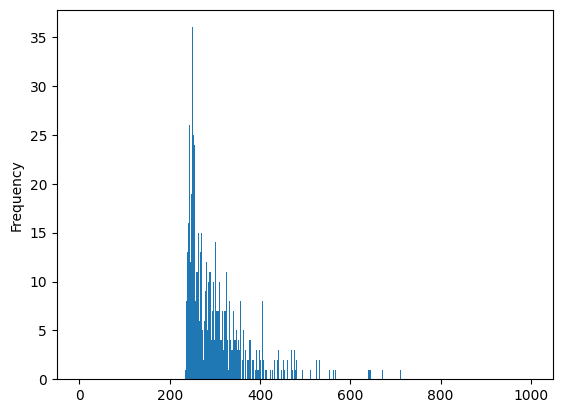

In [11]:
import numpy as np
df.toa.plot.hist(bins=np.arange(1000))

In [12]:
import lumacam
import pandas
lens = lumacam.Lens(archive="archive/test/openbeam_2e6")
opm = lens.refocus(zfocus=25/1.58,zfine=13.3)
openbeam_data = lens.trace_rays(print_stats=True,opm=opm,chunk_size=500,n_processes=10)

Loading simulation data:   0%|          | 0/11 [00:00<?, ?it/s]

Processing sim_data_0.csv...


Tracing rays:   0%|          | 0/1 [00:00<?, ?it/s]

Original number of events: 122	Traced events: 103	Percentage: 84.4%
Processing sim_data_1.csv...


Tracing rays:   0%|          | 0/1 [00:00<?, ?it/s]

Original number of events: 110	Traced events: 97	Percentage: 88.2%
Processing sim_data_10.csv...


Tracing rays: 0it [00:00, ?it/s]

Processing sim_data_2.csv...


Tracing rays:   0%|          | 0/1 [00:00<?, ?it/s]

Original number of events: 113	Traced events: 103	Percentage: 91.2%
Processing sim_data_3.csv...


Tracing rays:   0%|          | 0/1 [00:00<?, ?it/s]

Original number of events: 147	Traced events: 135	Percentage: 91.8%
Processing sim_data_4.csv...


Tracing rays:   0%|          | 0/1 [00:00<?, ?it/s]

Original number of events: 134	Traced events: 115	Percentage: 85.8%
Processing sim_data_5.csv...


Tracing rays:   0%|          | 0/1 [00:00<?, ?it/s]

Original number of events: 113	Traced events: 100	Percentage: 88.5%
Processing sim_data_6.csv...


Tracing rays:   0%|          | 0/1 [00:00<?, ?it/s]

Original number of events: 70	Traced events: 62	Percentage: 88.6%
Processing sim_data_7.csv...


Tracing rays:   0%|          | 0/1 [00:00<?, ?it/s]

Original number of events: 115	Traced events: 103	Percentage: 89.6%
Processing sim_data_8.csv...


Tracing rays:   0%|          | 0/1 [00:00<?, ?it/s]

Original number of events: 157	Traced events: 150	Percentage: 95.5%
Processing sim_data_9.csv...


Tracing rays:   0%|          | 0/1 [00:00<?, ?it/s]

Original number of events: 174	Traced events: 153	Percentage: 87.9%


In [13]:
o = lumacam.Analysis(archive="archive/test/openbeam").process_data()

Loading 11 traced photon files...


Loading traced data:   0%|          | 0/11 [00:00<?, ?it/s]

Processing files:   0%|          | 0/11 [00:00<?, ?it/s]

<Axes: >

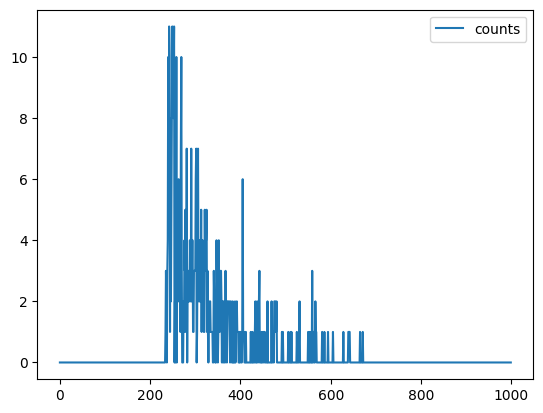

In [15]:
o.plot(y="counts")

In [12]:
sim = lumacam.Simulate("archive/ptb/openbeam_2e6")
config = lumacam.Config.neutrons_uniform_energy()
config.num_events = 2_000_000
config.source_position_z = -1590
config.energy_min = 1
config.max_theta = 0
config.csv_batch_size = 10_000
config.sample_material = "G4_Galactic"

In [13]:
pf = sim.run(config,verbosity=0)

Simulating:   0%|          | 0/2000000 [00:00<?, ?events/s]

In [14]:
sim = lumacam.Simulate("archive/ptb/graphite_2e6")
config = lumacam.Config.neutrons_uniform_energy()
config.num_events = 2_000_000
config.source_position_z = -1590
config.energy_min = 1
config.max_theta = 0
config.csv_batch_size = 10_000
config.sample_material = "G4_Graphite"

In [15]:
sf = sim.run(config,verbosity=0)

Simulating:   0%|          | 0/2000000 [00:00<?, ?events/s]

In [16]:
import numpy as np
-_import matplotlib.pyplot as plt
pf.plot.hist(y="toa",bins=np.arange(1000),histtype="step")
sf.plot.hist(y="toa",bins=np.arange(1000),histtype="step",ax=plt.gca())

SyntaxError: invalid syntax (2413537912.py, line 2)

# ray tracing

In [17]:
import lumacam
import pandas
lens = lumacam.Lens(archive="archive/ptb/openbeam_2e6")
opm = lens.refocus(zfocus=25/1.58,zfine=13.3)
openbeam_data = lens.trace_rays(print_stats=True,opm=opm,chunk_size=500,n_processes=10)

Loading simulation data:   0%|          | 0/201 [00:00<?, ?it/s]

Processing sim_data_0.csv...


Tracing rays:   0%|          | 0/24 [00:00<?, ?it/s]

Original number of events: 11733	Traced events: 10339	Percentage: 88.1%
Processing sim_data_1.csv...


Tracing rays:   0%|          | 0/24 [00:00<?, ?it/s]

Original number of events: 11689	Traced events: 10355	Percentage: 88.6%
Processing sim_data_10.csv...


Tracing rays:   0%|          | 0/24 [00:00<?, ?it/s]

Original number of events: 11688	Traced events: 10253	Percentage: 87.7%
Processing sim_data_100.csv...


Tracing rays:   0%|          | 0/24 [00:00<?, ?it/s]

Original number of events: 11777	Traced events: 10436	Percentage: 88.6%
Processing sim_data_101.csv...


Tracing rays:   0%|          | 0/24 [00:00<?, ?it/s]

Original number of events: 11858	Traced events: 10522	Percentage: 88.7%
Processing sim_data_102.csv...


Tracing rays:   0%|          | 0/23 [00:00<?, ?it/s]

Original number of events: 11432	Traced events: 10120	Percentage: 88.5%
Processing sim_data_103.csv...


Tracing rays:   0%|          | 0/24 [00:00<?, ?it/s]

Original number of events: 11569	Traced events: 10319	Percentage: 89.2%
Processing sim_data_104.csv...


Tracing rays:   0%|          | 0/23 [00:00<?, ?it/s]

Original number of events: 11358	Traced events: 10061	Percentage: 88.6%
Processing sim_data_105.csv...


Tracing rays:   0%|          | 0/24 [00:00<?, ?it/s]

Original number of events: 11592	Traced events: 10228	Percentage: 88.2%
Processing sim_data_106.csv...


Tracing rays:   0%|          | 0/24 [00:00<?, ?it/s]

Original number of events: 11657	Traced events: 10315	Percentage: 88.5%
Processing sim_data_107.csv...


Tracing rays:   0%|          | 0/23 [00:00<?, ?it/s]

Original number of events: 11372	Traced events: 10060	Percentage: 88.5%
Processing sim_data_108.csv...


Tracing rays:   0%|          | 0/25 [00:00<?, ?it/s]

Original number of events: 12039	Traced events: 10692	Percentage: 88.8%
Processing sim_data_109.csv...


Tracing rays:   0%|          | 0/23 [00:00<?, ?it/s]

Original number of events: 11416	Traced events: 10125	Percentage: 88.7%
Processing sim_data_11.csv...


Tracing rays:   0%|          | 0/24 [00:00<?, ?it/s]

Original number of events: 11800	Traced events: 10437	Percentage: 88.4%
Processing sim_data_110.csv...


Tracing rays:   0%|          | 0/23 [00:00<?, ?it/s]

Original number of events: 11419	Traced events: 10103	Percentage: 88.5%
Processing sim_data_111.csv...


Tracing rays:   0%|          | 0/23 [00:00<?, ?it/s]

Original number of events: 11416	Traced events: 10051	Percentage: 88.0%
Processing sim_data_112.csv...


Tracing rays:   0%|          | 0/24 [00:00<?, ?it/s]

Original number of events: 11856	Traced events: 10481	Percentage: 88.4%
Processing sim_data_113.csv...


Tracing rays:   0%|          | 0/23 [00:00<?, ?it/s]

Original number of events: 11116	Traced events: 9833	Percentage: 88.5%
Processing sim_data_114.csv...


Tracing rays:   0%|          | 0/24 [00:00<?, ?it/s]

Original number of events: 11771	Traced events: 10441	Percentage: 88.7%
Processing sim_data_115.csv...


Tracing rays:   0%|          | 0/24 [00:00<?, ?it/s]

Original number of events: 11658	Traced events: 10393	Percentage: 89.1%
Processing sim_data_116.csv...


Tracing rays:   0%|          | 0/24 [00:00<?, ?it/s]

Original number of events: 11596	Traced events: 10309	Percentage: 88.9%
Processing sim_data_117.csv...


Tracing rays:   0%|          | 0/24 [00:00<?, ?it/s]

Original number of events: 11733	Traced events: 10394	Percentage: 88.6%
Processing sim_data_118.csv...


Tracing rays:   0%|          | 0/23 [00:00<?, ?it/s]

Original number of events: 11435	Traced events: 10220	Percentage: 89.4%
Processing sim_data_119.csv...


Tracing rays:   0%|          | 0/23 [00:00<?, ?it/s]

Original number of events: 11039	Traced events: 9813	Percentage: 88.9%
Processing sim_data_12.csv...


Tracing rays:   0%|          | 0/23 [00:00<?, ?it/s]

Original number of events: 11268	Traced events: 9957	Percentage: 88.4%
Processing sim_data_120.csv...


Tracing rays:   0%|          | 0/23 [00:00<?, ?it/s]

Original number of events: 11494	Traced events: 10158	Percentage: 88.4%
Processing sim_data_121.csv...


Tracing rays:   0%|          | 0/23 [00:00<?, ?it/s]

Original number of events: 11180	Traced events: 9891	Percentage: 88.5%
Processing sim_data_122.csv...


Tracing rays:   0%|          | 0/24 [00:00<?, ?it/s]

Original number of events: 11903	Traced events: 10498	Percentage: 88.2%
Processing sim_data_123.csv...


Tracing rays:   0%|          | 0/24 [00:00<?, ?it/s]

Original number of events: 11578	Traced events: 10213	Percentage: 88.2%
Processing sim_data_124.csv...


Tracing rays:   0%|          | 0/25 [00:00<?, ?it/s]

Original number of events: 12037	Traced events: 10564	Percentage: 87.8%
Processing sim_data_125.csv...


Tracing rays:   0%|          | 0/24 [00:00<?, ?it/s]

Original number of events: 11977	Traced events: 10547	Percentage: 88.1%
Processing sim_data_126.csv...


Tracing rays:   0%|          | 0/24 [00:00<?, ?it/s]

Original number of events: 11750	Traced events: 10452	Percentage: 89.0%
Processing sim_data_127.csv...


Tracing rays:   0%|          | 0/24 [00:00<?, ?it/s]

Original number of events: 11639	Traced events: 10249	Percentage: 88.1%
Processing sim_data_128.csv...


Tracing rays:   0%|          | 0/23 [00:00<?, ?it/s]

Original number of events: 11321	Traced events: 9955	Percentage: 87.9%
Processing sim_data_129.csv...


Tracing rays:   0%|          | 0/24 [00:00<?, ?it/s]

Original number of events: 11552	Traced events: 10215	Percentage: 88.4%
Processing sim_data_13.csv...


Tracing rays:   0%|          | 0/24 [00:00<?, ?it/s]

Original number of events: 11978	Traced events: 10574	Percentage: 88.3%
Processing sim_data_130.csv...


Tracing rays:   0%|          | 0/23 [00:00<?, ?it/s]

Original number of events: 11384	Traced events: 10041	Percentage: 88.2%
Processing sim_data_131.csv...


Tracing rays:   0%|          | 0/24 [00:00<?, ?it/s]

Original number of events: 11961	Traced events: 10666	Percentage: 89.2%
Processing sim_data_132.csv...


Tracing rays:   0%|          | 0/24 [00:00<?, ?it/s]

Original number of events: 11596	Traced events: 10261	Percentage: 88.5%
Processing sim_data_133.csv...


Tracing rays:   0%|          | 0/24 [00:00<?, ?it/s]

Original number of events: 11503	Traced events: 10178	Percentage: 88.5%
Processing sim_data_134.csv...


Tracing rays:   0%|          | 0/24 [00:00<?, ?it/s]

Original number of events: 11576	Traced events: 10273	Percentage: 88.7%
Processing sim_data_135.csv...


Tracing rays:   0%|          | 0/24 [00:00<?, ?it/s]

Original number of events: 11982	Traced events: 10586	Percentage: 88.3%
Processing sim_data_136.csv...


Tracing rays:   0%|          | 0/24 [00:00<?, ?it/s]

Original number of events: 11695	Traced events: 10358	Percentage: 88.6%
Processing sim_data_137.csv...


Tracing rays:   0%|          | 0/24 [00:00<?, ?it/s]

Original number of events: 11694	Traced events: 10349	Percentage: 88.5%
Processing sim_data_138.csv...


Tracing rays:   0%|          | 0/25 [00:00<?, ?it/s]

Original number of events: 12064	Traced events: 10681	Percentage: 88.5%
Processing sim_data_139.csv...


Tracing rays:   0%|          | 0/23 [00:00<?, ?it/s]

Original number of events: 11348	Traced events: 10085	Percentage: 88.9%
Processing sim_data_14.csv...


Tracing rays:   0%|          | 0/23 [00:00<?, ?it/s]

Original number of events: 11353	Traced events: 10013	Percentage: 88.2%
Processing sim_data_140.csv...


Tracing rays:   0%|          | 0/24 [00:00<?, ?it/s]

Original number of events: 11674	Traced events: 10342	Percentage: 88.6%
Processing sim_data_141.csv...


Tracing rays:   0%|          | 0/25 [00:00<?, ?it/s]

Original number of events: 12026	Traced events: 10614	Percentage: 88.3%
Processing sim_data_142.csv...


Tracing rays:   0%|          | 0/24 [00:00<?, ?it/s]

Original number of events: 11688	Traced events: 10385	Percentage: 88.9%
Processing sim_data_143.csv...


Tracing rays:   0%|          | 0/22 [00:00<?, ?it/s]

Original number of events: 10839	Traced events: 9572	Percentage: 88.3%
Processing sim_data_144.csv...


Tracing rays:   0%|          | 0/23 [00:00<?, ?it/s]

Original number of events: 11422	Traced events: 10096	Percentage: 88.4%
Processing sim_data_145.csv...


Tracing rays:   0%|          | 0/23 [00:00<?, ?it/s]

Original number of events: 11231	Traced events: 9938	Percentage: 88.5%
Processing sim_data_146.csv...


Tracing rays:   0%|          | 0/24 [00:00<?, ?it/s]

Original number of events: 11666	Traced events: 10320	Percentage: 88.5%
Processing sim_data_147.csv...


Tracing rays:   0%|          | 0/24 [00:00<?, ?it/s]

Original number of events: 11836	Traced events: 10514	Percentage: 88.8%
Processing sim_data_148.csv...


Tracing rays:   0%|          | 0/23 [00:00<?, ?it/s]

Original number of events: 11280	Traced events: 9890	Percentage: 87.7%
Processing sim_data_149.csv...


Tracing rays:   0%|          | 0/23 [00:00<?, ?it/s]

Original number of events: 11398	Traced events: 10129	Percentage: 88.9%
Processing sim_data_15.csv...


Tracing rays:   0%|          | 0/23 [00:00<?, ?it/s]

Original number of events: 11495	Traced events: 10116	Percentage: 88.0%
Processing sim_data_150.csv...


Tracing rays:   0%|          | 0/24 [00:00<?, ?it/s]

Original number of events: 11720	Traced events: 10374	Percentage: 88.5%
Processing sim_data_151.csv...


Tracing rays:   0%|          | 0/24 [00:00<?, ?it/s]

Original number of events: 11558	Traced events: 10235	Percentage: 88.6%
Processing sim_data_152.csv...


Tracing rays:   0%|          | 0/24 [00:00<?, ?it/s]

Original number of events: 11538	Traced events: 10284	Percentage: 89.1%
Processing sim_data_153.csv...


Tracing rays:   0%|          | 0/23 [00:00<?, ?it/s]

Original number of events: 11474	Traced events: 10168	Percentage: 88.6%
Processing sim_data_154.csv...


Tracing rays:   0%|          | 0/24 [00:00<?, ?it/s]

Original number of events: 11810	Traced events: 10487	Percentage: 88.8%
Processing sim_data_155.csv...


Tracing rays:   0%|          | 0/23 [00:00<?, ?it/s]

Original number of events: 11349	Traced events: 10083	Percentage: 88.8%
Processing sim_data_156.csv...


Tracing rays:   0%|          | 0/24 [00:00<?, ?it/s]

Original number of events: 11836	Traced events: 10500	Percentage: 88.7%
Processing sim_data_157.csv...


Tracing rays:   0%|          | 0/23 [00:00<?, ?it/s]

Original number of events: 11371	Traced events: 10048	Percentage: 88.4%
Processing sim_data_158.csv...


Tracing rays:   0%|          | 0/24 [00:00<?, ?it/s]

Original number of events: 11687	Traced events: 10295	Percentage: 88.1%
Processing sim_data_159.csv...


Tracing rays:   0%|          | 0/24 [00:00<?, ?it/s]

Original number of events: 11704	Traced events: 10337	Percentage: 88.3%
Processing sim_data_16.csv...


Tracing rays:   0%|          | 0/24 [00:00<?, ?it/s]

Original number of events: 11945	Traced events: 10654	Percentage: 89.2%
Processing sim_data_160.csv...


Tracing rays:   0%|          | 0/22 [00:00<?, ?it/s]

Original number of events: 10852	Traced events: 9613	Percentage: 88.6%
Processing sim_data_161.csv...


Tracing rays:   0%|          | 0/23 [00:00<?, ?it/s]

Original number of events: 11181	Traced events: 9918	Percentage: 88.7%
Processing sim_data_162.csv...


Tracing rays:   0%|          | 0/23 [00:00<?, ?it/s]

Original number of events: 11293	Traced events: 10036	Percentage: 88.9%
Processing sim_data_163.csv...


Tracing rays:   0%|          | 0/24 [00:00<?, ?it/s]

Original number of events: 11539	Traced events: 10263	Percentage: 88.9%
Processing sim_data_164.csv...


Tracing rays:   0%|          | 0/23 [00:00<?, ?it/s]

Original number of events: 11482	Traced events: 10200	Percentage: 88.8%
Processing sim_data_165.csv...


Tracing rays:   0%|          | 0/23 [00:00<?, ?it/s]

Original number of events: 11378	Traced events: 10104	Percentage: 88.8%
Processing sim_data_166.csv...


Tracing rays:   0%|          | 0/24 [00:00<?, ?it/s]

Original number of events: 11676	Traced events: 10313	Percentage: 88.3%
Processing sim_data_167.csv...


Tracing rays:   0%|          | 0/25 [00:00<?, ?it/s]

Original number of events: 12011	Traced events: 10625	Percentage: 88.5%
Processing sim_data_168.csv...


Tracing rays:   0%|          | 0/25 [00:00<?, ?it/s]

Original number of events: 12001	Traced events: 10582	Percentage: 88.2%
Processing sim_data_169.csv...


Tracing rays:   0%|          | 0/23 [00:00<?, ?it/s]

Original number of events: 11411	Traced events: 10104	Percentage: 88.5%
Processing sim_data_17.csv...


Tracing rays:   0%|          | 0/25 [00:00<?, ?it/s]

Original number of events: 12050	Traced events: 10655	Percentage: 88.4%
Processing sim_data_170.csv...


Tracing rays:   0%|          | 0/24 [00:00<?, ?it/s]

Original number of events: 11712	Traced events: 10369	Percentage: 88.5%
Processing sim_data_171.csv...


Tracing rays:   0%|          | 0/24 [00:00<?, ?it/s]

Original number of events: 11843	Traced events: 10513	Percentage: 88.8%
Processing sim_data_172.csv...


Tracing rays:   0%|          | 0/24 [00:00<?, ?it/s]

Original number of events: 11857	Traced events: 10518	Percentage: 88.7%
Processing sim_data_173.csv...


Tracing rays:   0%|          | 0/24 [00:00<?, ?it/s]

Original number of events: 11702	Traced events: 10326	Percentage: 88.2%
Processing sim_data_174.csv...


Tracing rays:   0%|          | 0/24 [00:00<?, ?it/s]

Original number of events: 11661	Traced events: 10310	Percentage: 88.4%
Processing sim_data_175.csv...


Tracing rays:   0%|          | 0/24 [00:00<?, ?it/s]

Original number of events: 11852	Traced events: 10484	Percentage: 88.5%
Processing sim_data_176.csv...


Tracing rays:   0%|          | 0/23 [00:00<?, ?it/s]

Original number of events: 11341	Traced events: 10069	Percentage: 88.8%
Processing sim_data_177.csv...


Tracing rays:   0%|          | 0/23 [00:00<?, ?it/s]

Original number of events: 11396	Traced events: 10021	Percentage: 87.9%
Processing sim_data_178.csv...


Tracing rays:   0%|          | 0/23 [00:00<?, ?it/s]

Original number of events: 11476	Traced events: 10184	Percentage: 88.7%
Processing sim_data_179.csv...


Tracing rays:   0%|          | 0/23 [00:00<?, ?it/s]

Original number of events: 11464	Traced events: 10125	Percentage: 88.3%
Processing sim_data_18.csv...


Tracing rays:   0%|          | 0/24 [00:00<?, ?it/s]

Original number of events: 11647	Traced events: 10359	Percentage: 88.9%
Processing sim_data_180.csv...


Tracing rays:   0%|          | 0/24 [00:00<?, ?it/s]

Original number of events: 11557	Traced events: 10187	Percentage: 88.1%
Processing sim_data_181.csv...


Tracing rays:   0%|          | 0/23 [00:00<?, ?it/s]

Original number of events: 11201	Traced events: 9914	Percentage: 88.5%
Processing sim_data_182.csv...


Tracing rays:   0%|          | 0/24 [00:00<?, ?it/s]

Original number of events: 11517	Traced events: 10172	Percentage: 88.3%
Processing sim_data_183.csv...


Tracing rays:   0%|          | 0/24 [00:00<?, ?it/s]

Original number of events: 11531	Traced events: 10246	Percentage: 88.9%
Processing sim_data_184.csv...


Tracing rays:   0%|          | 0/24 [00:00<?, ?it/s]

Original number of events: 11627	Traced events: 10273	Percentage: 88.4%
Processing sim_data_185.csv...


Tracing rays:   0%|          | 0/23 [00:00<?, ?it/s]

Original number of events: 11316	Traced events: 10033	Percentage: 88.7%
Processing sim_data_186.csv...


Tracing rays:   0%|          | 0/24 [00:00<?, ?it/s]

Original number of events: 11590	Traced events: 10288	Percentage: 88.8%
Processing sim_data_187.csv...


Tracing rays:   0%|          | 0/24 [00:00<?, ?it/s]

Original number of events: 11557	Traced events: 10231	Percentage: 88.5%
Processing sim_data_188.csv...


Tracing rays:   0%|          | 0/24 [00:00<?, ?it/s]

Original number of events: 11633	Traced events: 10371	Percentage: 89.2%
Processing sim_data_189.csv...


Tracing rays:   0%|          | 0/24 [00:00<?, ?it/s]

Original number of events: 11879	Traced events: 10512	Percentage: 88.5%
Processing sim_data_19.csv...


Tracing rays:   0%|          | 0/24 [00:00<?, ?it/s]

Original number of events: 11601	Traced events: 10215	Percentage: 88.1%
Processing sim_data_190.csv...


Tracing rays:   0%|          | 0/24 [00:00<?, ?it/s]

Original number of events: 11947	Traced events: 10591	Percentage: 88.6%
Processing sim_data_191.csv...


Tracing rays:   0%|          | 0/24 [00:00<?, ?it/s]

Original number of events: 11703	Traced events: 10385	Percentage: 88.7%
Processing sim_data_192.csv...


Tracing rays:   0%|          | 0/24 [00:00<?, ?it/s]

Original number of events: 11723	Traced events: 10371	Percentage: 88.5%
Processing sim_data_193.csv...


Tracing rays:   0%|          | 0/24 [00:00<?, ?it/s]

Original number of events: 11741	Traced events: 10346	Percentage: 88.1%
Processing sim_data_194.csv...


Tracing rays:   0%|          | 0/24 [00:00<?, ?it/s]

Original number of events: 11740	Traced events: 10415	Percentage: 88.7%
Processing sim_data_195.csv...


Tracing rays:   0%|          | 0/25 [00:00<?, ?it/s]

Original number of events: 12283	Traced events: 10850	Percentage: 88.3%
Processing sim_data_196.csv...


Tracing rays:   0%|          | 0/22 [00:00<?, ?it/s]

Original number of events: 10848	Traced events: 9621	Percentage: 88.7%
Processing sim_data_197.csv...


Tracing rays:   0%|          | 0/24 [00:00<?, ?it/s]

Original number of events: 11931	Traced events: 10540	Percentage: 88.3%
Processing sim_data_198.csv...


Tracing rays:   0%|          | 0/24 [00:00<?, ?it/s]

Original number of events: 11902	Traced events: 10486	Percentage: 88.1%
Processing sim_data_199.csv...


Tracing rays:   0%|          | 0/24 [00:00<?, ?it/s]

Original number of events: 11601	Traced events: 10229	Percentage: 88.2%
Processing sim_data_2.csv...


Tracing rays:   0%|          | 0/23 [00:00<?, ?it/s]

Original number of events: 11330	Traced events: 10042	Percentage: 88.6%
Processing sim_data_20.csv...


Tracing rays:   0%|          | 0/24 [00:00<?, ?it/s]

Original number of events: 11535	Traced events: 10204	Percentage: 88.5%
Processing sim_data_200.csv...


Tracing rays: 0it [00:00, ?it/s]

Processing sim_data_21.csv...


Tracing rays:   0%|          | 0/24 [00:00<?, ?it/s]

Original number of events: 11665	Traced events: 10303	Percentage: 88.3%
Processing sim_data_22.csv...


Tracing rays:   0%|          | 0/23 [00:00<?, ?it/s]

Original number of events: 11492	Traced events: 10209	Percentage: 88.8%
Processing sim_data_23.csv...


Tracing rays:   0%|          | 0/23 [00:00<?, ?it/s]

Original number of events: 11339	Traced events: 10067	Percentage: 88.8%
Processing sim_data_24.csv...


Tracing rays:   0%|          | 0/24 [00:00<?, ?it/s]

Original number of events: 11695	Traced events: 10355	Percentage: 88.5%
Processing sim_data_25.csv...


Tracing rays:   0%|          | 0/24 [00:00<?, ?it/s]

Original number of events: 11877	Traced events: 10518	Percentage: 88.6%
Processing sim_data_26.csv...


Tracing rays:   0%|          | 0/25 [00:00<?, ?it/s]

Original number of events: 12002	Traced events: 10647	Percentage: 88.7%
Processing sim_data_27.csv...


Tracing rays:   0%|          | 0/24 [00:00<?, ?it/s]

Original number of events: 11757	Traced events: 10385	Percentage: 88.3%
Processing sim_data_28.csv...


Tracing rays:   0%|          | 0/23 [00:00<?, ?it/s]

Original number of events: 11422	Traced events: 10071	Percentage: 88.2%
Processing sim_data_29.csv...


Tracing rays:   0%|          | 0/24 [00:00<?, ?it/s]

Original number of events: 11996	Traced events: 10581	Percentage: 88.2%
Processing sim_data_3.csv...


Tracing rays:   0%|          | 0/25 [00:00<?, ?it/s]

Original number of events: 12129	Traced events: 10728	Percentage: 88.4%
Processing sim_data_30.csv...


Tracing rays:   0%|          | 0/23 [00:00<?, ?it/s]

Original number of events: 11483	Traced events: 10127	Percentage: 88.2%
Processing sim_data_31.csv...


Tracing rays:   0%|          | 0/24 [00:00<?, ?it/s]

Original number of events: 11625	Traced events: 10328	Percentage: 88.8%
Processing sim_data_32.csv...


Tracing rays:   0%|          | 0/23 [00:00<?, ?it/s]

Original number of events: 11032	Traced events: 9796	Percentage: 88.8%
Processing sim_data_33.csv...


Tracing rays:   0%|          | 0/24 [00:00<?, ?it/s]

Original number of events: 11817	Traced events: 10389	Percentage: 87.9%
Processing sim_data_34.csv...


Tracing rays:   0%|          | 0/24 [00:00<?, ?it/s]

Original number of events: 11606	Traced events: 10255	Percentage: 88.4%
Processing sim_data_35.csv...


Tracing rays:   0%|          | 0/24 [00:00<?, ?it/s]

Original number of events: 11680	Traced events: 10313	Percentage: 88.3%
Processing sim_data_36.csv...


Tracing rays:   0%|          | 0/25 [00:00<?, ?it/s]

Original number of events: 12013	Traced events: 10659	Percentage: 88.7%
Processing sim_data_37.csv...


Tracing rays:   0%|          | 0/24 [00:00<?, ?it/s]

Original number of events: 11993	Traced events: 10647	Percentage: 88.8%
Processing sim_data_38.csv...


Tracing rays:   0%|          | 0/23 [00:00<?, ?it/s]

Original number of events: 11157	Traced events: 9844	Percentage: 88.2%
Processing sim_data_39.csv...


Tracing rays:   0%|          | 0/24 [00:00<?, ?it/s]

Original number of events: 11537	Traced events: 10189	Percentage: 88.3%
Processing sim_data_4.csv...


Tracing rays:   0%|          | 0/23 [00:00<?, ?it/s]

Original number of events: 11139	Traced events: 9877	Percentage: 88.7%
Processing sim_data_40.csv...


Tracing rays:   0%|          | 0/23 [00:00<?, ?it/s]

Original number of events: 11366	Traced events: 10068	Percentage: 88.6%
Processing sim_data_41.csv...


Tracing rays:   0%|          | 0/24 [00:00<?, ?it/s]

Original number of events: 11544	Traced events: 10211	Percentage: 88.5%
Processing sim_data_42.csv...


Tracing rays:   0%|          | 0/24 [00:00<?, ?it/s]

Original number of events: 11767	Traced events: 10456	Percentage: 88.9%
Processing sim_data_43.csv...


Tracing rays:   0%|          | 0/24 [00:00<?, ?it/s]

Original number of events: 11562	Traced events: 10257	Percentage: 88.7%
Processing sim_data_44.csv...


Tracing rays:   0%|          | 0/25 [00:00<?, ?it/s]

Original number of events: 12052	Traced events: 10690	Percentage: 88.7%
Processing sim_data_45.csv...


Tracing rays:   0%|          | 0/23 [00:00<?, ?it/s]

Original number of events: 11479	Traced events: 10195	Percentage: 88.8%
Processing sim_data_46.csv...


Tracing rays:   0%|          | 0/23 [00:00<?, ?it/s]

Original number of events: 11337	Traced events: 10040	Percentage: 88.6%
Processing sim_data_47.csv...


Tracing rays:   0%|          | 0/23 [00:00<?, ?it/s]

Original number of events: 11471	Traced events: 10148	Percentage: 88.5%
Processing sim_data_48.csv...


Tracing rays:   0%|          | 0/24 [00:00<?, ?it/s]

Original number of events: 11676	Traced events: 10351	Percentage: 88.7%
Processing sim_data_49.csv...


Tracing rays:   0%|          | 0/24 [00:00<?, ?it/s]

Original number of events: 11583	Traced events: 10213	Percentage: 88.2%
Processing sim_data_5.csv...


Tracing rays:   0%|          | 0/23 [00:00<?, ?it/s]

Original number of events: 11435	Traced events: 10122	Percentage: 88.5%
Processing sim_data_50.csv...


Tracing rays:   0%|          | 0/24 [00:00<?, ?it/s]

Original number of events: 11727	Traced events: 10356	Percentage: 88.3%
Processing sim_data_51.csv...


Tracing rays:   0%|          | 0/23 [00:00<?, ?it/s]

Original number of events: 11299	Traced events: 9999	Percentage: 88.5%
Processing sim_data_52.csv...


Tracing rays:   0%|          | 0/23 [00:00<?, ?it/s]

Original number of events: 11455	Traced events: 10187	Percentage: 88.9%
Processing sim_data_53.csv...


Tracing rays:   0%|          | 0/23 [00:00<?, ?it/s]

Original number of events: 11213	Traced events: 9967	Percentage: 88.9%
Processing sim_data_54.csv...


Tracing rays:   0%|          | 0/24 [00:00<?, ?it/s]

Original number of events: 11520	Traced events: 10265	Percentage: 89.1%
Processing sim_data_55.csv...


Tracing rays:   0%|          | 0/24 [00:00<?, ?it/s]

Original number of events: 11959	Traced events: 10596	Percentage: 88.6%
Processing sim_data_56.csv...


Tracing rays:   0%|          | 0/23 [00:00<?, ?it/s]

Original number of events: 11100	Traced events: 9811	Percentage: 88.4%
Processing sim_data_57.csv...


Tracing rays:   0%|          | 0/24 [00:00<?, ?it/s]

Original number of events: 11722	Traced events: 10389	Percentage: 88.6%
Processing sim_data_58.csv...


Tracing rays:   0%|          | 0/24 [00:00<?, ?it/s]

Original number of events: 11875	Traced events: 10575	Percentage: 89.1%
Processing sim_data_59.csv...


Tracing rays:   0%|          | 0/23 [00:00<?, ?it/s]

Original number of events: 11489	Traced events: 10079	Percentage: 87.7%
Processing sim_data_6.csv...


Tracing rays:   0%|          | 0/24 [00:00<?, ?it/s]

Original number of events: 11807	Traced events: 10493	Percentage: 88.9%
Processing sim_data_60.csv...


Tracing rays:   0%|          | 0/24 [00:00<?, ?it/s]

Original number of events: 11562	Traced events: 10245	Percentage: 88.6%
Processing sim_data_61.csv...


Tracing rays:   0%|          | 0/22 [00:00<?, ?it/s]

Original number of events: 10907	Traced events: 9666	Percentage: 88.6%
Processing sim_data_62.csv...


Tracing rays:   0%|          | 0/24 [00:00<?, ?it/s]

Original number of events: 11772	Traced events: 10406	Percentage: 88.4%
Processing sim_data_63.csv...


Tracing rays:   0%|          | 0/23 [00:00<?, ?it/s]

Original number of events: 11134	Traced events: 9865	Percentage: 88.6%
Processing sim_data_64.csv...


Tracing rays:   0%|          | 0/24 [00:00<?, ?it/s]

Original number of events: 11765	Traced events: 10430	Percentage: 88.7%
Processing sim_data_65.csv...


Tracing rays:   0%|          | 0/25 [00:00<?, ?it/s]

Original number of events: 12008	Traced events: 10581	Percentage: 88.1%
Processing sim_data_66.csv...


Tracing rays:   0%|          | 0/24 [00:00<?, ?it/s]

Original number of events: 11671	Traced events: 10391	Percentage: 89.0%
Processing sim_data_67.csv...


Tracing rays:   0%|          | 0/24 [00:00<?, ?it/s]

Original number of events: 11735	Traced events: 10413	Percentage: 88.7%
Processing sim_data_68.csv...


Tracing rays:   0%|          | 0/24 [00:00<?, ?it/s]

Original number of events: 11548	Traced events: 10207	Percentage: 88.4%
Processing sim_data_69.csv...


Tracing rays:   0%|          | 0/24 [00:00<?, ?it/s]

Original number of events: 11729	Traced events: 10410	Percentage: 88.8%
Processing sim_data_7.csv...


Tracing rays:   0%|          | 0/23 [00:00<?, ?it/s]

Original number of events: 11331	Traced events: 10038	Percentage: 88.6%
Processing sim_data_70.csv...


Tracing rays:   0%|          | 0/24 [00:00<?, ?it/s]

Original number of events: 11793	Traced events: 10416	Percentage: 88.3%
Processing sim_data_71.csv...


Tracing rays:   0%|          | 0/24 [00:00<?, ?it/s]

Original number of events: 11613	Traced events: 10280	Percentage: 88.5%
Processing sim_data_72.csv...


Tracing rays:   0%|          | 0/22 [00:00<?, ?it/s]

Original number of events: 10985	Traced events: 9709	Percentage: 88.4%
Processing sim_data_73.csv...


Tracing rays:   0%|          | 0/25 [00:00<?, ?it/s]

Original number of events: 12028	Traced events: 10622	Percentage: 88.3%
Processing sim_data_74.csv...


Tracing rays:   0%|          | 0/25 [00:00<?, ?it/s]

Original number of events: 12077	Traced events: 10699	Percentage: 88.6%
Processing sim_data_75.csv...


Tracing rays:   0%|          | 0/24 [00:00<?, ?it/s]

Original number of events: 11788	Traced events: 10435	Percentage: 88.5%
Processing sim_data_76.csv...


Tracing rays:   0%|          | 0/25 [00:00<?, ?it/s]

Original number of events: 12173	Traced events: 10759	Percentage: 88.4%
Processing sim_data_77.csv...


Tracing rays:   0%|          | 0/24 [00:00<?, ?it/s]

Original number of events: 11558	Traced events: 10231	Percentage: 88.5%
Processing sim_data_78.csv...


Tracing rays:   0%|          | 0/24 [00:00<?, ?it/s]

Original number of events: 11541	Traced events: 10263	Percentage: 88.9%
Processing sim_data_79.csv...


Tracing rays:   0%|          | 0/23 [00:00<?, ?it/s]

Original number of events: 11404	Traced events: 10067	Percentage: 88.3%
Processing sim_data_8.csv...


Tracing rays:   0%|          | 0/24 [00:00<?, ?it/s]

Original number of events: 11510	Traced events: 10100	Percentage: 87.7%
Processing sim_data_80.csv...


Tracing rays:   0%|          | 0/24 [00:00<?, ?it/s]

Original number of events: 11678	Traced events: 10389	Percentage: 89.0%
Processing sim_data_81.csv...


Tracing rays:   0%|          | 0/24 [00:00<?, ?it/s]

Original number of events: 11674	Traced events: 10342	Percentage: 88.6%
Processing sim_data_82.csv...


Tracing rays:   0%|          | 0/23 [00:00<?, ?it/s]

Original number of events: 11466	Traced events: 10154	Percentage: 88.6%
Processing sim_data_83.csv...


Tracing rays:   0%|          | 0/23 [00:00<?, ?it/s]

Original number of events: 11318	Traced events: 10036	Percentage: 88.7%
Processing sim_data_84.csv...


Tracing rays:   0%|          | 0/23 [00:00<?, ?it/s]

Original number of events: 11335	Traced events: 10134	Percentage: 89.4%
Processing sim_data_85.csv...


Tracing rays:   0%|          | 0/23 [00:00<?, ?it/s]

Original number of events: 11239	Traced events: 9926	Percentage: 88.3%
Processing sim_data_86.csv...


Tracing rays:   0%|          | 0/23 [00:00<?, ?it/s]

Original number of events: 11130	Traced events: 9869	Percentage: 88.7%
Processing sim_data_87.csv...


Tracing rays:   0%|          | 0/24 [00:00<?, ?it/s]

Original number of events: 11542	Traced events: 10200	Percentage: 88.4%
Processing sim_data_88.csv...


Tracing rays:   0%|          | 0/23 [00:00<?, ?it/s]

Original number of events: 11476	Traced events: 10157	Percentage: 88.5%
Processing sim_data_89.csv...


Tracing rays:   0%|          | 0/23 [00:00<?, ?it/s]

Original number of events: 11282	Traced events: 10017	Percentage: 88.8%
Processing sim_data_9.csv...


Tracing rays:   0%|          | 0/23 [00:00<?, ?it/s]

Original number of events: 11486	Traced events: 10169	Percentage: 88.5%
Processing sim_data_90.csv...


Tracing rays:   0%|          | 0/23 [00:00<?, ?it/s]

Original number of events: 11489	Traced events: 10197	Percentage: 88.8%
Processing sim_data_91.csv...


Tracing rays:   0%|          | 0/24 [00:00<?, ?it/s]

Original number of events: 11670	Traced events: 10291	Percentage: 88.2%
Processing sim_data_92.csv...


Tracing rays:   0%|          | 0/24 [00:00<?, ?it/s]

Original number of events: 11637	Traced events: 10311	Percentage: 88.6%
Processing sim_data_93.csv...


Tracing rays:   0%|          | 0/24 [00:00<?, ?it/s]

Original number of events: 11879	Traced events: 10523	Percentage: 88.6%
Processing sim_data_94.csv...


Tracing rays:   0%|          | 0/23 [00:00<?, ?it/s]

Original number of events: 11471	Traced events: 10198	Percentage: 88.9%
Processing sim_data_95.csv...


Tracing rays:   0%|          | 0/24 [00:00<?, ?it/s]

Original number of events: 11903	Traced events: 10504	Percentage: 88.2%
Processing sim_data_96.csv...


Tracing rays:   0%|          | 0/24 [00:00<?, ?it/s]

Original number of events: 11556	Traced events: 10216	Percentage: 88.4%
Processing sim_data_97.csv...


Tracing rays:   0%|          | 0/23 [00:00<?, ?it/s]

Original number of events: 11188	Traced events: 9900	Percentage: 88.5%
Processing sim_data_98.csv...


Tracing rays:   0%|          | 0/23 [00:00<?, ?it/s]

Original number of events: 11088	Traced events: 9834	Percentage: 88.7%
Processing sim_data_99.csv...


Tracing rays:   0%|          | 0/24 [00:00<?, ?it/s]

Original number of events: 11667	Traced events: 10327	Percentage: 88.5%


In [18]:

lens = lumacam.Lens(archive="archive/ptb/graphite_2e6")
opm = lens.refocus(zfocus=25/1.58,zfine=13.3)
graphite_data = lens.trace_rays(print_stats=True,opm=opm,chunk_size=500,n_processes=10)

Loading simulation data:   0%|          | 0/201 [00:00<?, ?it/s]

Processing sim_data_0.csv...


Tracing rays:   0%|          | 0/9 [00:00<?, ?it/s]

Original number of events: 4228	Traced events: 3739	Percentage: 88.4%
Processing sim_data_1.csv...


Tracing rays:   0%|          | 0/9 [00:00<?, ?it/s]

Original number of events: 4323	Traced events: 3796	Percentage: 87.8%
Processing sim_data_10.csv...


Tracing rays:   0%|          | 0/8 [00:00<?, ?it/s]

Original number of events: 3923	Traced events: 3495	Percentage: 89.1%
Processing sim_data_100.csv...


Tracing rays:   0%|          | 0/9 [00:00<?, ?it/s]

Original number of events: 4355	Traced events: 3888	Percentage: 89.3%
Processing sim_data_101.csv...


Tracing rays:   0%|          | 0/10 [00:00<?, ?it/s]

Original number of events: 4518	Traced events: 3999	Percentage: 88.5%
Processing sim_data_102.csv...


Tracing rays:   0%|          | 0/9 [00:00<?, ?it/s]

Original number of events: 4276	Traced events: 3818	Percentage: 89.3%
Processing sim_data_103.csv...


Tracing rays:   0%|          | 0/9 [00:00<?, ?it/s]

Original number of events: 4218	Traced events: 3753	Percentage: 89.0%
Processing sim_data_104.csv...


Tracing rays:   0%|          | 0/9 [00:00<?, ?it/s]

Original number of events: 4459	Traced events: 3942	Percentage: 88.4%
Processing sim_data_105.csv...


Tracing rays:   0%|          | 0/9 [00:00<?, ?it/s]

Original number of events: 4167	Traced events: 3684	Percentage: 88.4%
Processing sim_data_106.csv...


Tracing rays:   0%|          | 0/8 [00:00<?, ?it/s]

Original number of events: 3946	Traced events: 3505	Percentage: 88.8%
Processing sim_data_107.csv...


Tracing rays:   0%|          | 0/9 [00:00<?, ?it/s]

Original number of events: 4246	Traced events: 3769	Percentage: 88.8%
Processing sim_data_108.csv...


Tracing rays:   0%|          | 0/9 [00:00<?, ?it/s]

Original number of events: 4311	Traced events: 3806	Percentage: 88.3%
Processing sim_data_109.csv...


Tracing rays:   0%|          | 0/9 [00:00<?, ?it/s]

Original number of events: 4028	Traced events: 3571	Percentage: 88.7%
Processing sim_data_11.csv...


Tracing rays:   0%|          | 0/9 [00:00<?, ?it/s]

Original number of events: 4315	Traced events: 3837	Percentage: 88.9%
Processing sim_data_110.csv...


Tracing rays:   0%|          | 0/9 [00:00<?, ?it/s]

Original number of events: 4439	Traced events: 3952	Percentage: 89.0%
Processing sim_data_111.csv...


Tracing rays:   0%|          | 0/9 [00:00<?, ?it/s]

Original number of events: 4132	Traced events: 3643	Percentage: 88.2%
Processing sim_data_112.csv...


Tracing rays:   0%|          | 0/9 [00:00<?, ?it/s]

Original number of events: 4103	Traced events: 3631	Percentage: 88.5%
Processing sim_data_113.csv...


Tracing rays:   0%|          | 0/9 [00:00<?, ?it/s]

Original number of events: 4251	Traced events: 3752	Percentage: 88.3%
Processing sim_data_114.csv...


Tracing rays:   0%|          | 0/9 [00:00<?, ?it/s]

Original number of events: 4352	Traced events: 3828	Percentage: 88.0%
Processing sim_data_115.csv...


Tracing rays:   0%|          | 0/9 [00:00<?, ?it/s]

Original number of events: 4215	Traced events: 3712	Percentage: 88.1%
Processing sim_data_116.csv...


Tracing rays:   0%|          | 0/8 [00:00<?, ?it/s]

Original number of events: 3815	Traced events: 3401	Percentage: 89.1%
Processing sim_data_117.csv...


Tracing rays:   0%|          | 0/10 [00:00<?, ?it/s]

Original number of events: 4538	Traced events: 4006	Percentage: 88.3%
Processing sim_data_118.csv...


Tracing rays:   0%|          | 0/9 [00:00<?, ?it/s]

Original number of events: 4239	Traced events: 3739	Percentage: 88.2%
Processing sim_data_119.csv...


Tracing rays:   0%|          | 0/9 [00:00<?, ?it/s]

Original number of events: 4027	Traced events: 3535	Percentage: 87.8%
Processing sim_data_12.csv...


Tracing rays:   0%|          | 0/9 [00:00<?, ?it/s]

Original number of events: 4232	Traced events: 3770	Percentage: 89.1%
Processing sim_data_120.csv...


Tracing rays:   0%|          | 0/9 [00:00<?, ?it/s]

Original number of events: 4146	Traced events: 3684	Percentage: 88.9%
Processing sim_data_121.csv...


Tracing rays:   0%|          | 0/9 [00:00<?, ?it/s]

Original number of events: 4169	Traced events: 3647	Percentage: 87.5%
Processing sim_data_122.csv...


Tracing rays:   0%|          | 0/9 [00:00<?, ?it/s]

Original number of events: 4179	Traced events: 3684	Percentage: 88.2%
Processing sim_data_123.csv...


Tracing rays:   0%|          | 0/9 [00:00<?, ?it/s]

Original number of events: 4430	Traced events: 3917	Percentage: 88.4%
Processing sim_data_124.csv...


Tracing rays:   0%|          | 0/9 [00:00<?, ?it/s]

Original number of events: 4183	Traced events: 3710	Percentage: 88.7%
Processing sim_data_125.csv...


Tracing rays:   0%|          | 0/9 [00:00<?, ?it/s]

Original number of events: 4129	Traced events: 3670	Percentage: 88.9%
Processing sim_data_126.csv...


Tracing rays:   0%|          | 0/9 [00:00<?, ?it/s]

Original number of events: 4341	Traced events: 3857	Percentage: 88.9%
Processing sim_data_127.csv...


Tracing rays:   0%|          | 0/9 [00:00<?, ?it/s]

Original number of events: 4149	Traced events: 3663	Percentage: 88.3%
Processing sim_data_128.csv...


Tracing rays:   0%|          | 0/9 [00:00<?, ?it/s]

Original number of events: 4360	Traced events: 3851	Percentage: 88.3%
Processing sim_data_129.csv...


Tracing rays:   0%|          | 0/9 [00:00<?, ?it/s]

Original number of events: 4083	Traced events: 3606	Percentage: 88.3%
Processing sim_data_13.csv...


Tracing rays:   0%|          | 0/9 [00:00<?, ?it/s]

Original number of events: 4213	Traced events: 3738	Percentage: 88.7%
Processing sim_data_130.csv...


Tracing rays:   0%|          | 0/10 [00:00<?, ?it/s]

Original number of events: 4509	Traced events: 4004	Percentage: 88.8%
Processing sim_data_131.csv...


Tracing rays:   0%|          | 0/9 [00:00<?, ?it/s]

Original number of events: 4314	Traced events: 3801	Percentage: 88.1%
Processing sim_data_132.csv...


Tracing rays:   0%|          | 0/9 [00:00<?, ?it/s]

Original number of events: 4170	Traced events: 3722	Percentage: 89.3%
Processing sim_data_133.csv...


Tracing rays:   0%|          | 0/9 [00:00<?, ?it/s]

Original number of events: 4040	Traced events: 3580	Percentage: 88.6%
Processing sim_data_134.csv...


Tracing rays:   0%|          | 0/8 [00:00<?, ?it/s]

Original number of events: 3937	Traced events: 3465	Percentage: 88.0%
Processing sim_data_135.csv...


Tracing rays:   0%|          | 0/9 [00:00<?, ?it/s]

Original number of events: 4149	Traced events: 3709	Percentage: 89.4%
Processing sim_data_136.csv...


Tracing rays:   0%|          | 0/9 [00:00<?, ?it/s]

Original number of events: 4206	Traced events: 3699	Percentage: 87.9%
Processing sim_data_137.csv...


Tracing rays:   0%|          | 0/9 [00:00<?, ?it/s]

Original number of events: 4262	Traced events: 3797	Percentage: 89.1%
Processing sim_data_138.csv...


Tracing rays:   0%|          | 0/9 [00:00<?, ?it/s]

Original number of events: 4273	Traced events: 3783	Percentage: 88.5%
Processing sim_data_139.csv...


Tracing rays:   0%|          | 0/9 [00:00<?, ?it/s]

Original number of events: 4268	Traced events: 3797	Percentage: 89.0%
Processing sim_data_14.csv...


Tracing rays:   0%|          | 0/9 [00:00<?, ?it/s]

Original number of events: 4229	Traced events: 3716	Percentage: 87.9%
Processing sim_data_140.csv...


Tracing rays:   0%|          | 0/9 [00:00<?, ?it/s]

Original number of events: 4045	Traced events: 3597	Percentage: 88.9%
Processing sim_data_141.csv...


Tracing rays:   0%|          | 0/10 [00:00<?, ?it/s]

Original number of events: 4587	Traced events: 4097	Percentage: 89.3%
Processing sim_data_142.csv...


Tracing rays:   0%|          | 0/9 [00:00<?, ?it/s]

Original number of events: 4109	Traced events: 3599	Percentage: 87.6%
Processing sim_data_143.csv...


Tracing rays:   0%|          | 0/9 [00:00<?, ?it/s]

Original number of events: 4135	Traced events: 3695	Percentage: 89.4%
Processing sim_data_144.csv...


Tracing rays:   0%|          | 0/9 [00:00<?, ?it/s]

Original number of events: 4159	Traced events: 3718	Percentage: 89.4%
Processing sim_data_145.csv...


Tracing rays:   0%|          | 0/9 [00:00<?, ?it/s]

Original number of events: 4053	Traced events: 3595	Percentage: 88.7%
Processing sim_data_146.csv...


Tracing rays:   0%|          | 0/10 [00:00<?, ?it/s]

Original number of events: 4579	Traced events: 4056	Percentage: 88.6%
Processing sim_data_147.csv...


Tracing rays:   0%|          | 0/9 [00:00<?, ?it/s]

Original number of events: 4084	Traced events: 3605	Percentage: 88.3%
Processing sim_data_148.csv...


Tracing rays:   0%|          | 0/9 [00:00<?, ?it/s]

Original number of events: 4359	Traced events: 3868	Percentage: 88.7%
Processing sim_data_149.csv...


Tracing rays:   0%|          | 0/9 [00:00<?, ?it/s]

Original number of events: 4318	Traced events: 3782	Percentage: 87.6%
Processing sim_data_15.csv...


Tracing rays:   0%|          | 0/9 [00:00<?, ?it/s]

Original number of events: 4407	Traced events: 3903	Percentage: 88.6%
Processing sim_data_150.csv...


Tracing rays:   0%|          | 0/8 [00:00<?, ?it/s]

Original number of events: 3893	Traced events: 3459	Percentage: 88.9%
Processing sim_data_151.csv...


Tracing rays:   0%|          | 0/9 [00:00<?, ?it/s]

Original number of events: 4472	Traced events: 3950	Percentage: 88.3%
Processing sim_data_152.csv...


Tracing rays:   0%|          | 0/9 [00:00<?, ?it/s]

Original number of events: 4174	Traced events: 3680	Percentage: 88.2%
Processing sim_data_153.csv...


Tracing rays:   0%|          | 0/10 [00:00<?, ?it/s]

Original number of events: 4673	Traced events: 4137	Percentage: 88.5%
Processing sim_data_154.csv...


Tracing rays:   0%|          | 0/9 [00:00<?, ?it/s]

Original number of events: 4227	Traced events: 3734	Percentage: 88.3%
Processing sim_data_155.csv...


Tracing rays:   0%|          | 0/8 [00:00<?, ?it/s]

Original number of events: 3931	Traced events: 3475	Percentage: 88.4%
Processing sim_data_156.csv...


Tracing rays:   0%|          | 0/9 [00:00<?, ?it/s]

Original number of events: 4284	Traced events: 3806	Percentage: 88.8%
Processing sim_data_157.csv...


Tracing rays:   0%|          | 0/9 [00:00<?, ?it/s]

Original number of events: 4191	Traced events: 3680	Percentage: 87.8%
Processing sim_data_158.csv...


Tracing rays:   0%|          | 0/9 [00:00<?, ?it/s]

Original number of events: 4429	Traced events: 3913	Percentage: 88.3%
Processing sim_data_159.csv...


Tracing rays:   0%|          | 0/9 [00:00<?, ?it/s]

Original number of events: 4180	Traced events: 3697	Percentage: 88.4%
Processing sim_data_16.csv...


Tracing rays:   0%|          | 0/9 [00:00<?, ?it/s]

Original number of events: 4022	Traced events: 3551	Percentage: 88.3%
Processing sim_data_160.csv...


Tracing rays:   0%|          | 0/9 [00:00<?, ?it/s]

Original number of events: 4348	Traced events: 3895	Percentage: 89.6%
Processing sim_data_161.csv...


Tracing rays:   0%|          | 0/10 [00:00<?, ?it/s]

Original number of events: 4520	Traced events: 4033	Percentage: 89.2%
Processing sim_data_162.csv...


Tracing rays:   0%|          | 0/8 [00:00<?, ?it/s]

Original number of events: 3918	Traced events: 3489	Percentage: 89.1%
Processing sim_data_163.csv...


Tracing rays:   0%|          | 0/9 [00:00<?, ?it/s]

Original number of events: 4340	Traced events: 3840	Percentage: 88.5%
Processing sim_data_164.csv...


Tracing rays:   0%|          | 0/9 [00:00<?, ?it/s]

Original number of events: 4425	Traced events: 3939	Percentage: 89.0%
Processing sim_data_165.csv...


Tracing rays:   0%|          | 0/9 [00:00<?, ?it/s]

Original number of events: 4256	Traced events: 3785	Percentage: 88.9%
Processing sim_data_166.csv...


Tracing rays:   0%|          | 0/9 [00:00<?, ?it/s]

Original number of events: 4363	Traced events: 3844	Percentage: 88.1%
Processing sim_data_167.csv...


Tracing rays:   0%|          | 0/9 [00:00<?, ?it/s]

Original number of events: 4231	Traced events: 3767	Percentage: 89.0%
Processing sim_data_168.csv...


Tracing rays:   0%|          | 0/9 [00:00<?, ?it/s]

Original number of events: 4253	Traced events: 3763	Percentage: 88.5%
Processing sim_data_169.csv...


Tracing rays:   0%|          | 0/9 [00:00<?, ?it/s]

Original number of events: 4151	Traced events: 3682	Percentage: 88.7%
Processing sim_data_17.csv...


Tracing rays:   0%|          | 0/9 [00:00<?, ?it/s]

Original number of events: 4324	Traced events: 3828	Percentage: 88.5%
Processing sim_data_170.csv...


Tracing rays:   0%|          | 0/9 [00:00<?, ?it/s]

Original number of events: 4041	Traced events: 3580	Percentage: 88.6%
Processing sim_data_171.csv...


Tracing rays:   0%|          | 0/9 [00:00<?, ?it/s]

Original number of events: 4338	Traced events: 3858	Percentage: 88.9%
Processing sim_data_172.csv...


Tracing rays:   0%|          | 0/9 [00:00<?, ?it/s]

Original number of events: 4151	Traced events: 3648	Percentage: 87.9%
Processing sim_data_173.csv...


Tracing rays:   0%|          | 0/9 [00:00<?, ?it/s]

Original number of events: 4072	Traced events: 3620	Percentage: 88.9%
Processing sim_data_174.csv...


Tracing rays:   0%|          | 0/9 [00:00<?, ?it/s]

Original number of events: 4421	Traced events: 3903	Percentage: 88.3%
Processing sim_data_175.csv...


Tracing rays:   0%|          | 0/9 [00:00<?, ?it/s]

Original number of events: 4329	Traced events: 3847	Percentage: 88.9%
Processing sim_data_176.csv...


Tracing rays:   0%|          | 0/9 [00:00<?, ?it/s]

Original number of events: 4182	Traced events: 3690	Percentage: 88.2%
Processing sim_data_177.csv...


Tracing rays:   0%|          | 0/9 [00:00<?, ?it/s]

Original number of events: 4373	Traced events: 3902	Percentage: 89.2%
Processing sim_data_178.csv...


Tracing rays:   0%|          | 0/9 [00:00<?, ?it/s]

Original number of events: 4341	Traced events: 3861	Percentage: 88.9%
Processing sim_data_179.csv...


Tracing rays:   0%|          | 0/9 [00:00<?, ?it/s]

Original number of events: 4144	Traced events: 3664	Percentage: 88.4%
Processing sim_data_18.csv...


Tracing rays:   0%|          | 0/9 [00:00<?, ?it/s]

Original number of events: 4058	Traced events: 3581	Percentage: 88.2%
Processing sim_data_180.csv...


Tracing rays:   0%|          | 0/8 [00:00<?, ?it/s]

Original number of events: 3885	Traced events: 3432	Percentage: 88.3%
Processing sim_data_181.csv...


Tracing rays:   0%|          | 0/9 [00:00<?, ?it/s]

Original number of events: 4187	Traced events: 3723	Percentage: 88.9%
Processing sim_data_182.csv...


Tracing rays:   0%|          | 0/9 [00:00<?, ?it/s]

Original number of events: 4306	Traced events: 3840	Percentage: 89.2%
Processing sim_data_183.csv...


Tracing rays:   0%|          | 0/9 [00:00<?, ?it/s]

Original number of events: 4361	Traced events: 3858	Percentage: 88.5%
Processing sim_data_184.csv...


Tracing rays:   0%|          | 0/8 [00:00<?, ?it/s]

Original number of events: 3902	Traced events: 3485	Percentage: 89.3%
Processing sim_data_185.csv...


Tracing rays:   0%|          | 0/9 [00:00<?, ?it/s]

Original number of events: 4217	Traced events: 3744	Percentage: 88.8%
Processing sim_data_186.csv...


Tracing rays:   0%|          | 0/9 [00:00<?, ?it/s]

Original number of events: 4256	Traced events: 3785	Percentage: 88.9%
Processing sim_data_187.csv...


Tracing rays:   0%|          | 0/9 [00:00<?, ?it/s]

Original number of events: 4272	Traced events: 3789	Percentage: 88.7%
Processing sim_data_188.csv...


Tracing rays:   0%|          | 0/9 [00:00<?, ?it/s]

Original number of events: 4146	Traced events: 3677	Percentage: 88.7%
Processing sim_data_189.csv...


Tracing rays:   0%|          | 0/10 [00:00<?, ?it/s]

Original number of events: 4805	Traced events: 4248	Percentage: 88.4%
Processing sim_data_19.csv...


Tracing rays:   0%|          | 0/9 [00:00<?, ?it/s]

Original number of events: 4132	Traced events: 3640	Percentage: 88.1%
Processing sim_data_190.csv...


Tracing rays:   0%|          | 0/9 [00:00<?, ?it/s]

Original number of events: 4230	Traced events: 3729	Percentage: 88.2%
Processing sim_data_191.csv...


Tracing rays:   0%|          | 0/9 [00:00<?, ?it/s]

Original number of events: 4443	Traced events: 3938	Percentage: 88.6%
Processing sim_data_192.csv...


Tracing rays:   0%|          | 0/9 [00:00<?, ?it/s]

Original number of events: 4322	Traced events: 3841	Percentage: 88.9%
Processing sim_data_193.csv...


Tracing rays:   0%|          | 0/9 [00:00<?, ?it/s]

Original number of events: 4114	Traced events: 3646	Percentage: 88.6%
Processing sim_data_194.csv...


Tracing rays:   0%|          | 0/9 [00:00<?, ?it/s]

Original number of events: 4452	Traced events: 3926	Percentage: 88.2%
Processing sim_data_195.csv...


Tracing rays:   0%|          | 0/9 [00:00<?, ?it/s]

Original number of events: 4280	Traced events: 3758	Percentage: 87.8%
Processing sim_data_196.csv...


Tracing rays:   0%|          | 0/9 [00:00<?, ?it/s]

Original number of events: 4386	Traced events: 3892	Percentage: 88.7%
Processing sim_data_197.csv...


Tracing rays:   0%|          | 0/9 [00:00<?, ?it/s]

Original number of events: 4233	Traced events: 3728	Percentage: 88.1%
Processing sim_data_198.csv...


Tracing rays:   0%|          | 0/9 [00:00<?, ?it/s]

Original number of events: 4079	Traced events: 3564	Percentage: 87.4%
Processing sim_data_199.csv...


Tracing rays:   0%|          | 0/8 [00:00<?, ?it/s]

Original number of events: 3831	Traced events: 3408	Percentage: 89.0%
Processing sim_data_2.csv...


Tracing rays:   0%|          | 0/8 [00:00<?, ?it/s]

Original number of events: 3882	Traced events: 3472	Percentage: 89.4%
Processing sim_data_20.csv...


Tracing rays:   0%|          | 0/8 [00:00<?, ?it/s]

Original number of events: 3961	Traced events: 3510	Percentage: 88.6%
Processing sim_data_200.csv...


Tracing rays: 0it [00:00, ?it/s]

Processing sim_data_21.csv...


Tracing rays:   0%|          | 0/9 [00:00<?, ?it/s]

Original number of events: 4085	Traced events: 3611	Percentage: 88.4%
Processing sim_data_22.csv...


Tracing rays:   0%|          | 0/9 [00:00<?, ?it/s]

Original number of events: 4288	Traced events: 3786	Percentage: 88.3%
Processing sim_data_23.csv...


Tracing rays:   0%|          | 0/9 [00:00<?, ?it/s]

Original number of events: 4298	Traced events: 3838	Percentage: 89.3%
Processing sim_data_24.csv...


Tracing rays:   0%|          | 0/9 [00:00<?, ?it/s]

Original number of events: 4175	Traced events: 3720	Percentage: 89.1%
Processing sim_data_25.csv...


Tracing rays:   0%|          | 0/10 [00:00<?, ?it/s]

Original number of events: 4540	Traced events: 3994	Percentage: 88.0%
Processing sim_data_26.csv...


Tracing rays:   0%|          | 0/8 [00:00<?, ?it/s]

Original number of events: 3967	Traced events: 3495	Percentage: 88.1%
Processing sim_data_27.csv...


Tracing rays:   0%|          | 0/9 [00:00<?, ?it/s]

Original number of events: 4162	Traced events: 3675	Percentage: 88.3%
Processing sim_data_28.csv...


Tracing rays:   0%|          | 0/9 [00:00<?, ?it/s]

Original number of events: 4124	Traced events: 3652	Percentage: 88.6%
Processing sim_data_29.csv...


Tracing rays:   0%|          | 0/9 [00:00<?, ?it/s]

Original number of events: 4252	Traced events: 3762	Percentage: 88.5%
Processing sim_data_3.csv...


Tracing rays:   0%|          | 0/9 [00:00<?, ?it/s]

Original number of events: 4444	Traced events: 3920	Percentage: 88.2%
Processing sim_data_30.csv...


Tracing rays:   0%|          | 0/9 [00:00<?, ?it/s]

Original number of events: 4185	Traced events: 3705	Percentage: 88.5%
Processing sim_data_31.csv...


Tracing rays:   0%|          | 0/9 [00:00<?, ?it/s]

Original number of events: 4259	Traced events: 3730	Percentage: 87.6%
Processing sim_data_32.csv...


Tracing rays:   0%|          | 0/10 [00:00<?, ?it/s]

Original number of events: 4558	Traced events: 4025	Percentage: 88.3%
Processing sim_data_33.csv...


Tracing rays:   0%|          | 0/8 [00:00<?, ?it/s]

Original number of events: 3981	Traced events: 3542	Percentage: 89.0%
Processing sim_data_34.csv...


Tracing rays:   0%|          | 0/9 [00:00<?, ?it/s]

Original number of events: 4043	Traced events: 3574	Percentage: 88.4%
Processing sim_data_35.csv...


Tracing rays:   0%|          | 0/8 [00:00<?, ?it/s]

Original number of events: 3963	Traced events: 3531	Percentage: 89.1%
Processing sim_data_36.csv...


Tracing rays:   0%|          | 0/9 [00:00<?, ?it/s]

Original number of events: 4001	Traced events: 3572	Percentage: 89.3%
Processing sim_data_37.csv...


Tracing rays:   0%|          | 0/9 [00:00<?, ?it/s]

Original number of events: 4154	Traced events: 3684	Percentage: 88.7%
Processing sim_data_38.csv...


Tracing rays:   0%|          | 0/9 [00:00<?, ?it/s]

Original number of events: 4398	Traced events: 3916	Percentage: 89.0%
Processing sim_data_39.csv...


Tracing rays:   0%|          | 0/9 [00:00<?, ?it/s]

Original number of events: 4353	Traced events: 3872	Percentage: 89.0%
Processing sim_data_4.csv...


Tracing rays:   0%|          | 0/8 [00:00<?, ?it/s]

Original number of events: 3992	Traced events: 3509	Percentage: 87.9%
Processing sim_data_40.csv...


Tracing rays:   0%|          | 0/8 [00:00<?, ?it/s]

Original number of events: 3954	Traced events: 3484	Percentage: 88.1%
Processing sim_data_41.csv...


Tracing rays:   0%|          | 0/9 [00:00<?, ?it/s]

Original number of events: 4016	Traced events: 3573	Percentage: 89.0%
Processing sim_data_42.csv...


Tracing rays:   0%|          | 0/9 [00:00<?, ?it/s]

Original number of events: 4147	Traced events: 3703	Percentage: 89.3%
Processing sim_data_43.csv...


Tracing rays:   0%|          | 0/9 [00:00<?, ?it/s]

Original number of events: 4112	Traced events: 3638	Percentage: 88.5%
Processing sim_data_44.csv...


Tracing rays:   0%|          | 0/9 [00:00<?, ?it/s]

Original number of events: 4361	Traced events: 3870	Percentage: 88.7%
Processing sim_data_45.csv...


Tracing rays:   0%|          | 0/9 [00:00<?, ?it/s]

Original number of events: 4149	Traced events: 3664	Percentage: 88.3%
Processing sim_data_46.csv...


Tracing rays:   0%|          | 0/9 [00:00<?, ?it/s]

Original number of events: 4121	Traced events: 3599	Percentage: 87.3%
Processing sim_data_47.csv...


Tracing rays:   0%|          | 0/9 [00:00<?, ?it/s]

Original number of events: 4421	Traced events: 3939	Percentage: 89.1%
Processing sim_data_48.csv...


Tracing rays:   0%|          | 0/9 [00:00<?, ?it/s]

Original number of events: 4133	Traced events: 3669	Percentage: 88.8%
Processing sim_data_49.csv...


Tracing rays:   0%|          | 0/8 [00:00<?, ?it/s]

Original number of events: 3944	Traced events: 3491	Percentage: 88.5%
Processing sim_data_5.csv...


Tracing rays:   0%|          | 0/9 [00:00<?, ?it/s]

Original number of events: 4236	Traced events: 3740	Percentage: 88.3%
Processing sim_data_50.csv...


Tracing rays:   0%|          | 0/9 [00:00<?, ?it/s]

Original number of events: 4240	Traced events: 3782	Percentage: 89.2%
Processing sim_data_51.csv...


Tracing rays:   0%|          | 0/8 [00:00<?, ?it/s]

Original number of events: 3994	Traced events: 3511	Percentage: 87.9%
Processing sim_data_52.csv...


Tracing rays:   0%|          | 0/9 [00:00<?, ?it/s]

Original number of events: 4403	Traced events: 3910	Percentage: 88.8%
Processing sim_data_53.csv...


Tracing rays:   0%|          | 0/8 [00:00<?, ?it/s]

Original number of events: 3962	Traced events: 3515	Percentage: 88.7%
Processing sim_data_54.csv...


Tracing rays:   0%|          | 0/10 [00:00<?, ?it/s]

Original number of events: 4575	Traced events: 4080	Percentage: 89.2%
Processing sim_data_55.csv...


Tracing rays:   0%|          | 0/9 [00:00<?, ?it/s]

Original number of events: 4132	Traced events: 3653	Percentage: 88.4%
Processing sim_data_56.csv...


Tracing rays:   0%|          | 0/9 [00:00<?, ?it/s]

Original number of events: 4010	Traced events: 3571	Percentage: 89.1%
Processing sim_data_57.csv...


Tracing rays:   0%|          | 0/9 [00:00<?, ?it/s]

Original number of events: 4201	Traced events: 3740	Percentage: 89.0%
Processing sim_data_58.csv...


Tracing rays:   0%|          | 0/9 [00:00<?, ?it/s]

Original number of events: 4106	Traced events: 3633	Percentage: 88.5%
Processing sim_data_59.csv...


Tracing rays:   0%|          | 0/8 [00:00<?, ?it/s]

Original number of events: 3620	Traced events: 3218	Percentage: 88.9%
Processing sim_data_6.csv...


Tracing rays:   0%|          | 0/9 [00:00<?, ?it/s]

Original number of events: 4031	Traced events: 3556	Percentage: 88.2%
Processing sim_data_60.csv...


Tracing rays:   0%|          | 0/9 [00:00<?, ?it/s]

Original number of events: 4156	Traced events: 3668	Percentage: 88.3%
Processing sim_data_61.csv...


Tracing rays:   0%|          | 0/8 [00:00<?, ?it/s]

Original number of events: 3797	Traced events: 3343	Percentage: 88.0%
Processing sim_data_62.csv...


Tracing rays:   0%|          | 0/9 [00:00<?, ?it/s]

Original number of events: 4292	Traced events: 3825	Percentage: 89.1%
Processing sim_data_63.csv...


Tracing rays:   0%|          | 0/9 [00:00<?, ?it/s]

Original number of events: 4400	Traced events: 3900	Percentage: 88.6%
Processing sim_data_64.csv...


Tracing rays:   0%|          | 0/9 [00:00<?, ?it/s]

Original number of events: 4149	Traced events: 3669	Percentage: 88.4%
Processing sim_data_65.csv...


Tracing rays:   0%|          | 0/8 [00:00<?, ?it/s]

Original number of events: 3911	Traced events: 3509	Percentage: 89.7%
Processing sim_data_66.csv...


Tracing rays:   0%|          | 0/9 [00:00<?, ?it/s]

Original number of events: 4303	Traced events: 3822	Percentage: 88.8%
Processing sim_data_67.csv...


Tracing rays:   0%|          | 0/9 [00:00<?, ?it/s]

Original number of events: 4205	Traced events: 3735	Percentage: 88.8%
Processing sim_data_68.csv...


Tracing rays:   0%|          | 0/9 [00:00<?, ?it/s]

Original number of events: 4288	Traced events: 3792	Percentage: 88.4%
Processing sim_data_69.csv...


Tracing rays:   0%|          | 0/9 [00:00<?, ?it/s]

Original number of events: 4274	Traced events: 3807	Percentage: 89.1%
Processing sim_data_7.csv...


Tracing rays:   0%|          | 0/8 [00:00<?, ?it/s]

Original number of events: 3850	Traced events: 3383	Percentage: 87.9%
Processing sim_data_70.csv...


Tracing rays:   0%|          | 0/9 [00:00<?, ?it/s]

Original number of events: 4196	Traced events: 3731	Percentage: 88.9%
Processing sim_data_71.csv...


Tracing rays:   0%|          | 0/9 [00:00<?, ?it/s]

Original number of events: 4151	Traced events: 3677	Percentage: 88.6%
Processing sim_data_72.csv...


Tracing rays:   0%|          | 0/9 [00:00<?, ?it/s]

Original number of events: 4462	Traced events: 3978	Percentage: 89.2%
Processing sim_data_73.csv...


Tracing rays:   0%|          | 0/9 [00:00<?, ?it/s]

Original number of events: 4122	Traced events: 3663	Percentage: 88.9%
Processing sim_data_74.csv...


Tracing rays:   0%|          | 0/8 [00:00<?, ?it/s]

Original number of events: 3864	Traced events: 3394	Percentage: 87.8%
Processing sim_data_75.csv...


Tracing rays:   0%|          | 0/9 [00:00<?, ?it/s]

Original number of events: 4116	Traced events: 3649	Percentage: 88.7%
Processing sim_data_76.csv...


Tracing rays:   0%|          | 0/9 [00:00<?, ?it/s]

Original number of events: 4093	Traced events: 3621	Percentage: 88.5%
Processing sim_data_77.csv...


Tracing rays:   0%|          | 0/9 [00:00<?, ?it/s]

Original number of events: 4278	Traced events: 3785	Percentage: 88.5%
Processing sim_data_78.csv...


Tracing rays:   0%|          | 0/9 [00:00<?, ?it/s]

Original number of events: 4039	Traced events: 3571	Percentage: 88.4%
Processing sim_data_79.csv...


Tracing rays:   0%|          | 0/9 [00:00<?, ?it/s]

Original number of events: 4277	Traced events: 3806	Percentage: 89.0%
Processing sim_data_8.csv...


Tracing rays:   0%|          | 0/9 [00:00<?, ?it/s]

Original number of events: 4361	Traced events: 3902	Percentage: 89.5%
Processing sim_data_80.csv...


Tracing rays:   0%|          | 0/9 [00:00<?, ?it/s]

Original number of events: 4225	Traced events: 3757	Percentage: 88.9%
Processing sim_data_81.csv...


Tracing rays:   0%|          | 0/8 [00:00<?, ?it/s]

Original number of events: 3832	Traced events: 3393	Percentage: 88.5%
Processing sim_data_82.csv...


Tracing rays:   0%|          | 0/9 [00:00<?, ?it/s]

Original number of events: 4193	Traced events: 3749	Percentage: 89.4%
Processing sim_data_83.csv...


Tracing rays:   0%|          | 0/9 [00:00<?, ?it/s]

Original number of events: 4327	Traced events: 3843	Percentage: 88.8%
Processing sim_data_84.csv...


Tracing rays:   0%|          | 0/9 [00:00<?, ?it/s]

Original number of events: 4215	Traced events: 3719	Percentage: 88.2%
Processing sim_data_85.csv...


Tracing rays:   0%|          | 0/9 [00:00<?, ?it/s]

Original number of events: 4025	Traced events: 3558	Percentage: 88.4%
Processing sim_data_86.csv...


Tracing rays:   0%|          | 0/8 [00:00<?, ?it/s]

Original number of events: 3669	Traced events: 3220	Percentage: 87.8%
Processing sim_data_87.csv...


Tracing rays:   0%|          | 0/9 [00:00<?, ?it/s]

Original number of events: 4093	Traced events: 3626	Percentage: 88.6%
Processing sim_data_88.csv...


Tracing rays:   0%|          | 0/9 [00:00<?, ?it/s]

Original number of events: 4367	Traced events: 3899	Percentage: 89.3%
Processing sim_data_89.csv...


Tracing rays:   0%|          | 0/9 [00:00<?, ?it/s]

Original number of events: 4298	Traced events: 3804	Percentage: 88.5%
Processing sim_data_9.csv...


Tracing rays:   0%|          | 0/9 [00:00<?, ?it/s]

Original number of events: 4004	Traced events: 3554	Percentage: 88.8%
Processing sim_data_90.csv...


Tracing rays:   0%|          | 0/9 [00:00<?, ?it/s]

Original number of events: 4105	Traced events: 3664	Percentage: 89.3%
Processing sim_data_91.csv...


Tracing rays:   0%|          | 0/9 [00:00<?, ?it/s]

Original number of events: 4149	Traced events: 3652	Percentage: 88.0%
Processing sim_data_92.csv...


Tracing rays:   0%|          | 0/9 [00:00<?, ?it/s]

Original number of events: 4287	Traced events: 3808	Percentage: 88.8%
Processing sim_data_93.csv...


Tracing rays:   0%|          | 0/8 [00:00<?, ?it/s]

Original number of events: 3895	Traced events: 3467	Percentage: 89.0%
Processing sim_data_94.csv...


Tracing rays:   0%|          | 0/9 [00:00<?, ?it/s]

Original number of events: 4360	Traced events: 3844	Percentage: 88.2%
Processing sim_data_95.csv...


Tracing rays:   0%|          | 0/9 [00:00<?, ?it/s]

Original number of events: 4202	Traced events: 3667	Percentage: 87.3%
Processing sim_data_96.csv...


Tracing rays:   0%|          | 0/9 [00:00<?, ?it/s]

Original number of events: 4349	Traced events: 3801	Percentage: 87.4%
Processing sim_data_97.csv...


Tracing rays:   0%|          | 0/10 [00:00<?, ?it/s]

Original number of events: 4653	Traced events: 4141	Percentage: 89.0%
Processing sim_data_98.csv...


Tracing rays:   0%|          | 0/9 [00:00<?, ?it/s]

Original number of events: 4286	Traced events: 3815	Percentage: 89.0%
Processing sim_data_99.csv...


Tracing rays:   0%|          | 0/9 [00:00<?, ?it/s]

Original number of events: 4390	Traced events: 3906	Percentage: 89.0%


# Analysis
```json
{
"pixel2photon": {
"dSpace": 2,
"dTime": 5e-8,
"nPxMin": 5,
"TDC1": true
},
"photon2event": {
"dSpace_px": 40,
"dTime_s": 50e-9,
"durationMax_s": 500e-9,
"dTime_ext": 5
},
"event2image": {
"size_x": 512,
"size_y":
512,
"nPhotons_min": 1,
"nPhotons_max": 9999,
"psd_min":
0,
"time_extTrigger": "reference",
"time_res_s": 1.5625e-9,
"time_limit": 640
}}
```

In [5]:
import lumacam
import pandas
analysis = lumacam.Analysis(archive="archive/ptb/openbeam")

Loading 101 traced photon files...


Loading traced data:   0%|          | 0/101 [00:00<?, ?it/s]

In [6]:
analysis.run_import_photons()

AttributeError: 'Analysis' object has no attribute 'run_import_photons'

In [3]:
config = analysis.Photon2EventConfig()
config.dSpace_px = 40
config.dTime_s = 50e-9
config.durationMax_s = 500e-9
config.dTime_ext = 5

analysis._run_photon2event(verbosity=1,config=config)

Processing traced_sim_data_4.empirphot:   0%|          | 0/100 [00:00<?, ?it/s]

Processing traced_sim_data_0.empirphot:   0%|          | 0/100 [00:00<?, ?it/s]

Processing traced_sim_data_3.empirphot:   0%|          | 0/100 [00:00<?, ?it/s]

Processing traced_sim_data_7.empirphot:   0%|          | 0/100 [00:00<?, ?it/s]

Processing traced_sim_data_8.empirphot:   0%|          | 0/100 [00:00<?, ?it/s]

Processing traced_sim_data_9.empirphot:   0%|          | 0/100 [00:00<?, ?it/s]

Processing traced_sim_data_6.empirphot:   0%|          | 0/100 [00:00<?, ?it/s]

Processing traced_sim_data_5.empirphot:   0%|          | 0/100 [00:00<?, ?it/s]

Processing traced_sim_data_1.empirphot:   0%|          | 0/100 [00:00<?, ?it/s]

Processing traced_sim_data_2.empirphot:   0%|          | 0/100 [00:00<?, ?it/s]

In [4]:
config = analysis.EventBinningConfig().time_binning()
# config.write("data/test/.parameterEvents.json")

In [5]:
analysis._run_event_binning(config=config,verbosity=0)

In [23]:
import lumacam
openbeam = lumacam.Analysis(archive="archive/ptb/openbeam_2e6/").process_data(dSpace_px=1)
graphite = lumacam.Analysis(archive="archive/ptb/graphite_2e6/").process_data(dSpace_px=1)

Loading 201 traced photon files...


Loading traced data:   0%|          | 0/201 [00:00<?, ?it/s]

Processing files:   0%|          | 0/201 [00:00<?, ?it/s]

Loading 201 traced photon files...


Loading traced data:   0%|          | 0/201 [00:00<?, ?it/s]

Processing files:   0%|          | 0/201 [00:00<?, ?it/s]

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


<Axes: >

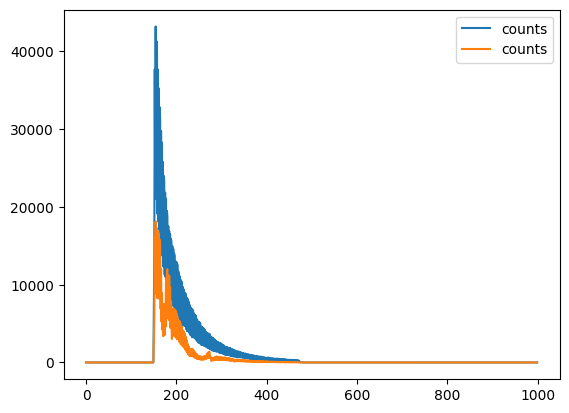

In [28]:
%pylab inline
openbeam.plot(y="counts")
graphite.plot(y="counts",ax=gca())

In [29]:
import nres

In [30]:
data = nres.Data.from_counts(signal="archive/ptb/graphite_2e6/counts.csv",
                      openbeam="archive/ptb/openbeam_2e6/counts.csv",L=10.59)

<Axes: xlabel='Energy [eV]', ylabel='Transmission'>

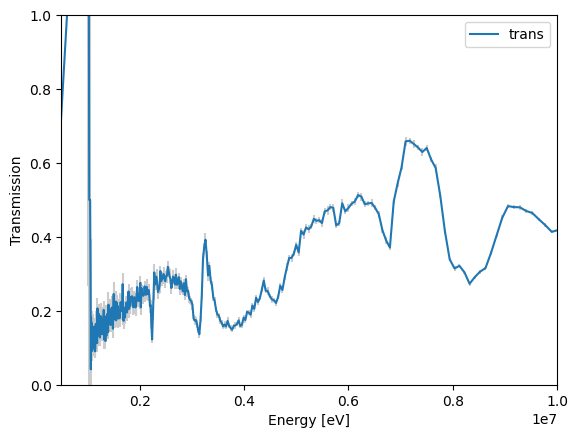

In [31]:
data.plot(logx=False)

In [32]:
xs = nres.CrossSection(graphite=nres.materials["Carbon, Graphite (reactor grade)"],first_tbin=0)

array([<Axes: xlabel='energy', ylabel='Transmission'>,
       <Axes: xlabel='Energy [eV]', ylabel='Residuals [1σ]'>],
      dtype=object)

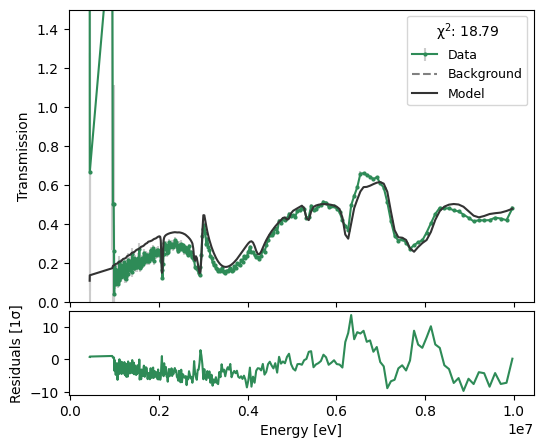

In [38]:
model = nres.TransmissionModel(xs,vary_background=False,vary_tof=True)
model.params["t0"].set(value=2.4e-9,min=0,max=300e-9,vary=True)
model.params["L0"].set(value=0.96743996	,min=0,max=3,vary=True)
model.params["thickness"].set(value=7.5,vary=False)
model.params["norm"].set(value=1,vary=False)
# model.params
model.plot(data=data,ylim=(0,1.5))

In [39]:
data.table = data.table.dropna()

In [41]:
result = model.fit(data,emin=1e6,emax=9e6,method="nelder")

array([<Axes: ylabel='Transmission'>,
       <Axes: xlabel='Energy [eV]', ylabel='Residuals [1σ]'>],
      dtype=object)

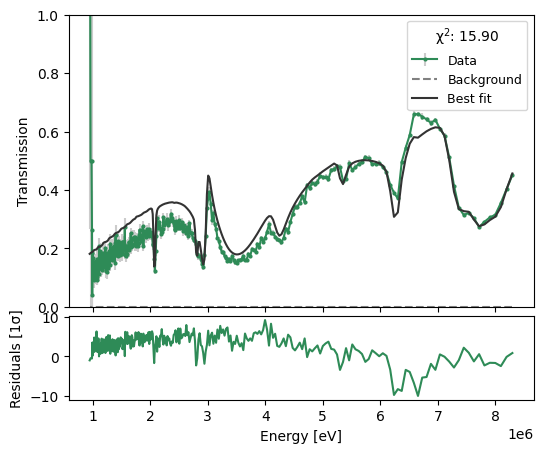

In [42]:
result.plot(plot_bg=True,ylim=(0,1))

In [43]:
result.least_squares()

Vary empir params

In [44]:
from tqdm.notebook import tqdm
results = {}
for dspace in tqdm(range(1,11,1)):
    openbeam = lumacam.Analysis(archive="archive/ptb/openbeam_2e6").process_data(dSpace_px=dspace,dTime_s=5e-9)
    graphite = lumacam.Analysis(archive="archive/ptb/graphite_2e6").process_data(dSpace_px=dspace,dTime_s=5e-9)
    model = nres.TransmissionModel(xs,vary_background=False,vary_tof=False)
    model.params["t0"].set(value=0,min=0,max=300e-9,vary=True)
    model.params["L0"].set(value=0.96289048,min=0,max=3,vary=False)
    model.params["thickness"].set(value=7.5,vary=False)
    model.params["norm"].set(value=1,vary=False)
    data = nres.Data.from_counts(signal="archive/ptb/graphite/counts.csv",
                          openbeam="archive/ptb/openbeam/counts.csv",L=10.59)
    data.table = data.table.dropna()
    result = model.fit(data,emin=1.2e6,emax=9e6)
    results[dspace] = result

  0%|          | 0/10 [00:00<?, ?it/s]

Loading 201 traced photon files...


Loading traced data:   0%|          | 0/201 [00:00<?, ?it/s]

Processing files:   0%|          | 0/201 [00:00<?, ?it/s]

Loading 201 traced photon files...


Loading traced data:   0%|          | 0/201 [00:00<?, ?it/s]

Processing files:   0%|          | 0/201 [00:00<?, ?it/s]

Loading 201 traced photon files...


Loading traced data:   0%|          | 0/201 [00:00<?, ?it/s]

Processing files:   0%|          | 0/201 [00:00<?, ?it/s]

Loading 201 traced photon files...


Loading traced data:   0%|          | 0/201 [00:00<?, ?it/s]

Processing files:   0%|          | 0/201 [00:00<?, ?it/s]

Loading 201 traced photon files...


Loading traced data:   0%|          | 0/201 [00:00<?, ?it/s]

Processing files:   0%|          | 0/201 [00:00<?, ?it/s]

Loading 201 traced photon files...


Loading traced data:   0%|          | 0/201 [00:00<?, ?it/s]

Processing files:   0%|          | 0/201 [00:00<?, ?it/s]

Loading 201 traced photon files...


Loading traced data:   0%|          | 0/201 [00:00<?, ?it/s]

Processing files:   0%|          | 0/201 [00:00<?, ?it/s]

Loading 201 traced photon files...


Loading traced data:   0%|          | 0/201 [00:00<?, ?it/s]

Processing files:   0%|          | 0/201 [00:00<?, ?it/s]

Loading 201 traced photon files...


Loading traced data:   0%|          | 0/201 [00:00<?, ?it/s]

Processing files:   0%|          | 0/201 [00:00<?, ?it/s]

Loading 201 traced photon files...


Loading traced data:   0%|          | 0/201 [00:00<?, ?it/s]

Processing files:   0%|          | 0/201 [00:00<?, ?it/s]

Loading 201 traced photon files...


Loading traced data:   0%|          | 0/201 [00:00<?, ?it/s]

Processing files:   0%|          | 0/201 [00:00<?, ?it/s]

Loading 201 traced photon files...


Loading traced data:   0%|          | 0/201 [00:00<?, ?it/s]

Processing files:   0%|          | 0/201 [00:00<?, ?it/s]

Loading 201 traced photon files...


Loading traced data:   0%|          | 0/201 [00:00<?, ?it/s]

Processing files:   0%|          | 0/201 [00:00<?, ?it/s]

Loading 201 traced photon files...


Loading traced data:   0%|          | 0/201 [00:00<?, ?it/s]

Processing files:   0%|          | 0/201 [00:00<?, ?it/s]

Loading 201 traced photon files...


Loading traced data:   0%|          | 0/201 [00:00<?, ?it/s]

Processing files:   0%|          | 0/201 [00:00<?, ?it/s]

Loading 201 traced photon files...


Loading traced data:   0%|          | 0/201 [00:00<?, ?it/s]

Processing files:   0%|          | 0/201 [00:00<?, ?it/s]

Loading 201 traced photon files...


Loading traced data:   0%|          | 0/201 [00:00<?, ?it/s]

Processing files:   0%|          | 0/201 [00:00<?, ?it/s]

Loading 201 traced photon files...


Loading traced data:   0%|          | 0/201 [00:00<?, ?it/s]

Processing files:   0%|          | 0/201 [00:00<?, ?it/s]

Loading 201 traced photon files...


Loading traced data:   0%|          | 0/201 [00:00<?, ?it/s]

Processing files:   0%|          | 0/201 [00:00<?, ?it/s]

Loading 201 traced photon files...


Loading traced data:   0%|          | 0/201 [00:00<?, ?it/s]

Processing files:   0%|          | 0/201 [00:00<?, ?it/s]

In [45]:
import pandas
chi2 = pandas.Series({key:results[key].redchi for key in results})
t0 = pandas.Series({key:results[key].values["t0"] for key in results})
# bg0 = pandas.Series({key:results[key].values["b0"] for key in results})
# bg1 = pandas.Series({key:results[key].values["b1"] for key in results})
# bg2 = pandas.Series({key:results[key].values["b2"] for key in results})

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


Text(0, 0.5, 'reduced χ2')

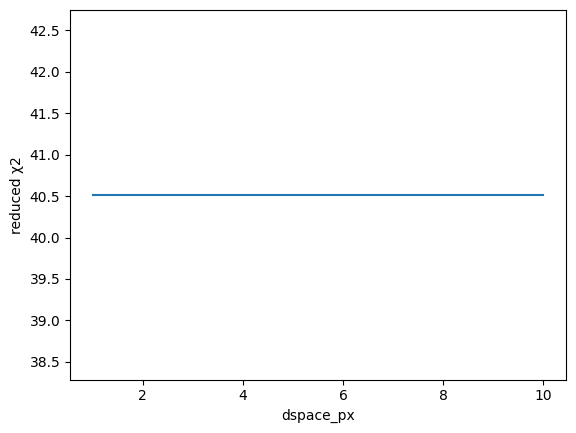

In [46]:
%pylab inline
chi2.plot()
xlabel("dspace_px")
ylabel("reduced χ2")

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


Text(0, 0.5, 't0 [s]')

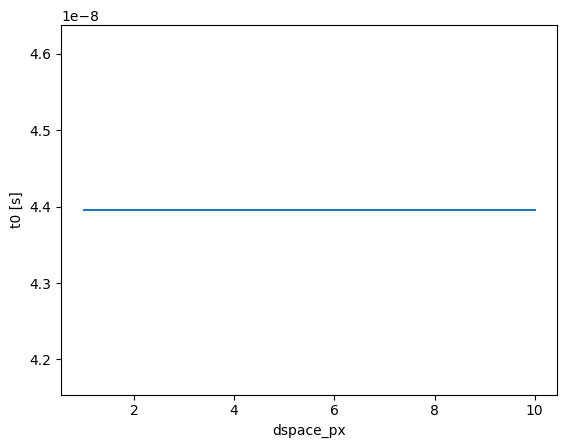

In [47]:
%pylab inline
t0.plot()
xlabel("dspace_px")
ylabel("t0 [s]")

array([<Axes: ylabel='Transmission'>,
       <Axes: xlabel='Energy [eV]', ylabel='Residuals [1σ]'>],
      dtype=object)

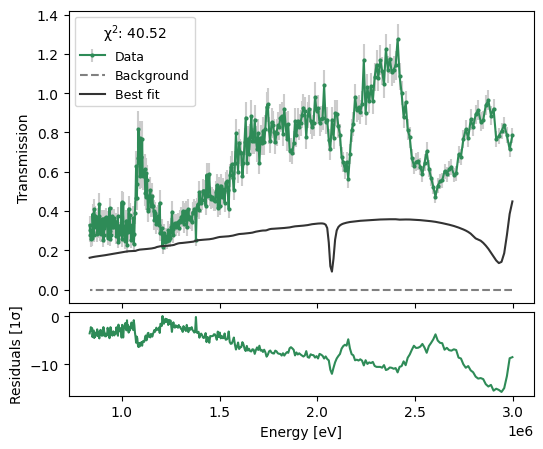

In [50]:
results[2].plot()

In [1]:
import lumacam

In [2]:
analysis = lumacam.Analysis(archive="archive/ptb/openbeam_1e5")

Loading traced data:   0%|          | 0/11 [00:00<?, ?it/s]

Loading sim data:   0%|          | 0/11 [00:00<?, ?it/s]

In [3]:
import pandas
df = pandas.read_csv("archive/ptb/openbeam_1e5/EventResults/batch_0_results.csv")

In [9]:
df = analysis.process_data_event_by_event(verbosity=0)

Processing neutron events:   0%|          | 0/27390 [00:00<?, ?it/s]

<Axes: xlabel='neutron_id'>

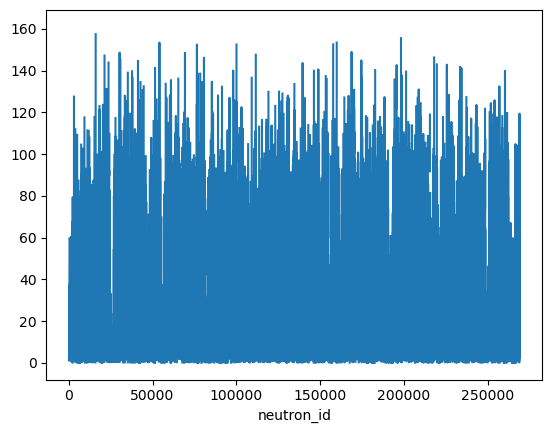

In [7]:
df.groupby("neutron_id")["x [px]"

In [8]:
df.nPho

,x [px],y [px],t [s],nPhotons [1],PSD value,t_relToExtTrigger [s],neutron_id
0,218.19,149.53,5.296875e-07,1.0,0.000000e+00,nan,0
1,59.18,200.48,5.906250e-07,1.0,0.000000e+00,nan,13
2,78.65,219.32,5.921875e-07,1.0,0.000000e+00,nan,13
3,58.85,81.40,2.375000e-07,13.0,2.524038e-09,nan,22
4,79.92,109.18,3.109375e-07,3.0,4.166667e-09,nan,40
...,...,...,...,...,...,...,...
61994,22.59,31.35,2.500000e-07,1.0,0.000000e+00,nan,269196
61995,87.85,208.29,2.515625e-07,7.0,1.339286e-09,nan,269196
61996,44.83,70.61,2.531250e-07,1.0,0.000000e+00,nan,269196
61997,109.38,201.71,2.500000e-07,2.0,7.812500e-10,nan,269209


In [4]:
print(analysis.sim_data.query("neutron_id==269196"))


           id  parent_id  neutron_id        x        y   z        dx  \
115652  25390          2      269196 -40.3898  32.1678  50  0.100603   
115653  21676          2      269196 -40.4184  32.0804  50  0.068064   
115654  19069          2      269196 -40.3945  32.0914  50  0.091501   
115655  18270          2      269196 -40.5202  32.0744  50  0.053632   
115656  11227          2      269196 -40.4448  32.1017  50  0.093058   
115657  10080          2      269196 -40.4338  32.0902  50  0.080957   
115658   9033          2      269196 -40.4958  32.2331  50  0.108717   
115659   7396          2      269196 -40.4110  32.0618  50  0.105444   
115660   2542          2      269196 -40.5405  32.1215  50  0.089820   

              dy        dz  toa  wavelength parentName       px      py  \
115652 -0.027374  0.994550  253     428.926     proton -40.5214  32.183   
115653 -0.067058  0.995425  250     442.632     proton -40.5214  32.183   
115654 -0.067868  0.993490  253     443.209     proton

In [6]:
print(analysis.data.iloc[115652:115661])

              x2        y2   z2  toa2
115652 -6.497816 -4.483641  0.0   253
115653 -8.234791 -7.550863  0.0   250
115654 -3.016251  6.319692  0.0   253
115655 -3.345355  6.091252  0.0   251
115656 -3.083562  6.381762  0.0   255
115657 -3.072563  6.212703  0.0   251
115658 -3.244564  6.224615  0.0   253
115659 -3.202390  6.382587  0.0   253
115660 -2.992373  6.295153  0.0   253


In [8]:
print(df.query("neutron_id==269196"))

       x [px]   y [px]         t [s]   nPhotons [1]     PSD value  \
61994   22.59    31.35  2.500000e-07            1.0  0.000000e+00   
61995   87.85   208.29  2.515625e-07            7.0  1.339286e-09   
61996   44.83    70.61  2.531250e-07            1.0  0.000000e+00   

       t_relToExtTrigger [s]  neutron_id  
61994                    nan      269196  
61995                    nan      269196  
61996                    nan      269196  


In [4]:
df.columns = [col.lstrip() for col in df.columns]

In [12]:
df.dropna(subset="x [px]")

,x [px],y [px],t [s],nPhotons [1],PSD value,t_relToExtTrigger [s],neutron_id
0,218.19,149.53,5.296875e-07,1.0,0.000000e+00,nan,0
1,59.18,200.48,5.906250e-07,1.0,0.000000e+00,nan,13
2,78.65,219.32,5.921875e-07,1.0,0.000000e+00,nan,13
3,58.85,81.40,2.375000e-07,13.0,2.524038e-09,nan,22
4,79.92,109.18,3.109375e-07,3.0,4.166667e-09,nan,40
...,...,...,...,...,...,...,...
61994,22.59,31.35,2.500000e-07,1.0,0.000000e+00,nan,269196
61995,87.85,208.29,2.515625e-07,7.0,1.339286e-09,nan,269196
61996,44.83,70.61,2.531250e-07,1.0,0.000000e+00,nan,269196
61997,109.38,201.71,2.500000e-07,2.0,7.812500e-10,nan,269209


In [3]:
dg = analysis.calculate_event_ellipsoid_shape(verbosity=0)

Processing reconstructed events:   0%|          | 0/61999 [00:00<?, ?it/s]

In [7]:
dg

,x [px],y [px],t [s],nPhotons [1],PSD value,t_relToExtTrigger [s],neutron_id,major_axis_px,minor_axis_px,orientation_deg,original_photon_ids,track_length_3d,track_length_xy,track_length_x,track_length_y,track_length_z,parent_name,parent_energy,ellipticity,area_px2
0,218.19,149.53,5.296875e-07,1.0,0.000000e+00,nan,0,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,proton,5.376710e-01,NaN,NaN
1,59.18,200.48,5.906250e-07,1.0,0.000000e+00,nan,13,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,proton,5.165210e-07,NaN,NaN
2,78.65,219.32,5.921875e-07,1.0,0.000000e+00,nan,13,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,proton,5.165210e-07,NaN,NaN
3,58.85,81.40,2.375000e-07,13.0,2.524038e-09,nan,22,3.730361,3.131164e+00,119.965042,"[5, 7, 10, 13, 16, 14, 17, 12, 15, 9, 8, 6, 11]",40.876902,40.403053,27.84167,29.27880,6.2060,proton,3.727370e-02,1.191366e+00,3.669497e+01
4,79.92,109.18,3.109375e-07,3.0,4.166667e-09,nan,40,6.233019,1.503246e+00,169.704956,"[26, 22, 19]",85.224103,82.922663,64.46050,52.16332,19.6718,proton,1.190000e-05,4.146374e+00,2.943597e+01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61994,22.59,31.35,2.500000e-07,1.0,0.000000e+00,nan,269196,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,proton,2.056820e+00,NaN,NaN
61995,87.85,208.29,2.515625e-07,7.0,1.339286e-09,nan,269196,108.884140,2.796199e+00,72.638051,"[115655, 115657, 115652, 115654, 115658, 11565...",0.581335,0.287265,0.22610,0.17720,0.5054,proton,2.056820e+00,3.894005e+01,9.564947e+02
61996,44.83,70.61,2.531250e-07,1.0,0.000000e+00,nan,269196,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,proton,2.056820e+00,NaN,NaN
61997,109.38,201.71,2.500000e-07,2.0,7.812500e-10,nan,269209,5.833320,4.492027e-14,27.942446,"[115663, 115664]",0.124412,0.103458,0.02799,0.09960,0.0691,proton,6.134940e+00,1.298594e+14,8.232049e-13


In [9]:
dg.parent_name.value_counts()

parent_name
proton      59038
e-           1283
C12          1152
alpha          48
Be9            43
C13            21
deuteron        5
Name: count, dtype: int64

In [18]:
dg

,x [px],y [px],t [s],nPhotons [1],PSD value,t_relToExtTrigger [s],neutron_id,major_axis_px,minor_axis_px,orientation_deg,original_photon_ids,track_length_3d,track_length_xy,track_length_x,track_length_y,track_length_z,parent_name,parent_energy,ellipticity,area_px2
0,218.19,149.53,5.296875e-07,1.0,0.000000e+00,nan,0,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,proton,5.376710e-01,NaN,NaN
1,59.18,200.48,5.906250e-07,1.0,0.000000e+00,nan,13,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,proton,5.165210e-07,NaN,NaN
2,78.65,219.32,5.921875e-07,1.0,0.000000e+00,nan,13,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,proton,5.165210e-07,NaN,NaN
3,58.85,81.40,2.375000e-07,13.0,2.524038e-09,nan,22,3.730361,3.131164e+00,119.965042,"[5, 7, 10, 13, 16, 14, 17, 12, 15, 9, 8, 6, 11]",40.876902,40.403053,27.84167,29.27880,6.2060,proton,3.727370e-02,1.191366e+00,3.669497e+01
4,79.92,109.18,3.109375e-07,3.0,4.166667e-09,nan,40,6.233019,1.503246e+00,169.704956,"[26, 22, 19]",85.224103,82.922663,64.46050,52.16332,19.6718,proton,1.190000e-05,4.146374e+00,2.943597e+01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61994,22.59,31.35,2.500000e-07,1.0,0.000000e+00,nan,269196,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,proton,2.056820e+00,NaN,NaN
61995,87.85,208.29,2.515625e-07,7.0,1.339286e-09,nan,269196,108.884140,2.796199e+00,72.638051,"[115655, 115657, 115652, 115654, 115658, 11565...",0.581335,0.287265,0.22610,0.17720,0.5054,proton,2.056820e+00,3.894005e+01,9.564947e+02
61996,44.83,70.61,2.531250e-07,1.0,0.000000e+00,nan,269196,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,proton,2.056820e+00,NaN,NaN
61997,109.38,201.71,2.500000e-07,2.0,7.812500e-10,nan,269209,5.833320,4.492027e-14,27.942446,"[115663, 115664]",0.124412,0.103458,0.02799,0.09960,0.0691,proton,6.134940e+00,1.298594e+14,8.232049e-13


(0.0, 10.0)

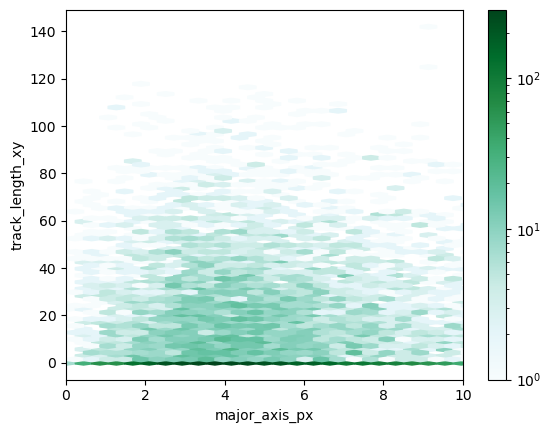

In [24]:
dg.query("track_length_xy>0").plot.hexbin(x="major_axis_px",y="track_length_xy",bins="log",gridsize=(1000,50))
xlim(0,10)

In [25]:
dg

,x [px],y [px],t [s],nPhotons [1],PSD value,t_relToExtTrigger [s],neutron_id,major_axis_px,minor_axis_px,orientation_deg,original_photon_ids,track_length_3d,track_length_xy,track_length_x,track_length_y,track_length_z,parent_name,parent_energy,ellipticity,area_px2
0,218.19,149.53,5.296875e-07,1.0,0.000000e+00,nan,0,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,proton,5.376710e-01,NaN,NaN
1,59.18,200.48,5.906250e-07,1.0,0.000000e+00,nan,13,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,proton,5.165210e-07,NaN,NaN
2,78.65,219.32,5.921875e-07,1.0,0.000000e+00,nan,13,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,proton,5.165210e-07,NaN,NaN
3,58.85,81.40,2.375000e-07,13.0,2.524038e-09,nan,22,3.730361,3.131164e+00,119.965042,"[5, 7, 10, 13, 16, 14, 17, 12, 15, 9, 8, 6, 11]",40.876902,40.403053,27.84167,29.27880,6.2060,proton,3.727370e-02,1.191366e+00,3.669497e+01
4,79.92,109.18,3.109375e-07,3.0,4.166667e-09,nan,40,6.233019,1.503246e+00,169.704956,"[26, 22, 19]",85.224103,82.922663,64.46050,52.16332,19.6718,proton,1.190000e-05,4.146374e+00,2.943597e+01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61994,22.59,31.35,2.500000e-07,1.0,0.000000e+00,nan,269196,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,proton,2.056820e+00,NaN,NaN
61995,87.85,208.29,2.515625e-07,7.0,1.339286e-09,nan,269196,108.884140,2.796199e+00,72.638051,"[115655, 115657, 115652, 115654, 115658, 11565...",0.581335,0.287265,0.22610,0.17720,0.5054,proton,2.056820e+00,3.894005e+01,9.564947e+02
61996,44.83,70.61,2.531250e-07,1.0,0.000000e+00,nan,269196,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,proton,2.056820e+00,NaN,NaN
61997,109.38,201.71,2.500000e-07,2.0,7.812500e-10,nan,269209,5.833320,4.492027e-14,27.942446,"[115663, 115664]",0.124412,0.103458,0.02799,0.09960,0.0691,proton,6.134940e+00,1.298594e+14,8.232049e-13


In [11]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


<Axes: ylabel='Frequency'>

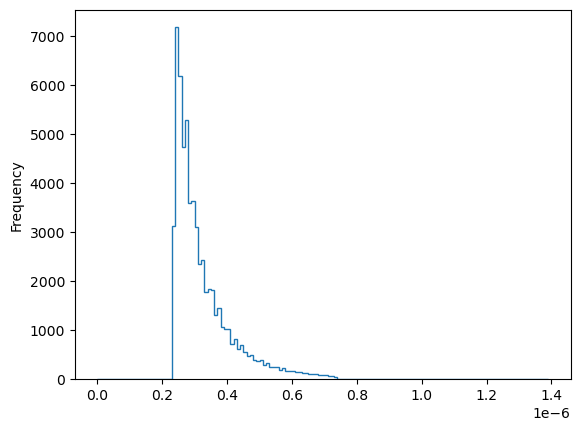

In [31]:
dg["t [s]"].plot.hist(bins=arange(140)*10e-9,histtype="step")

<Axes: ylabel='Frequency'>

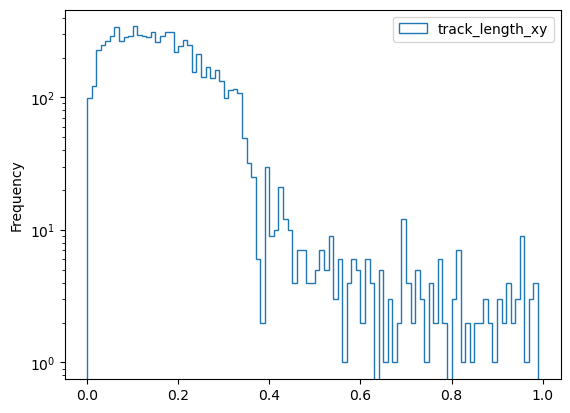

In [17]:
dg.plot.hist(y="track_length_xy",bins=arange(0,1,0.01),logy=True,histtype="step",ax=gca())

In [8]:
dg

,x [px],y [px],t [s],nPhotons [1],PSD value,t_relToExtTrigger [s],neutron_id,major_axis_px,minor_axis_px,orientation_deg,original_photon_ids,track_length_3d,track_length_xy,track_length_x,track_length_y,track_length_z,ellipticity,area_px2
0,218.19,149.53,5.296875e-07,1.0,0.000000e+00,nan,0,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,59.18,200.48,5.906250e-07,1.0,0.000000e+00,nan,13,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,78.65,219.32,5.921875e-07,1.0,0.000000e+00,nan,13,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,58.85,81.40,2.375000e-07,13.0,2.524038e-09,nan,22,3.730361,3.131164e+00,119.965042,"[5, 7, 10, 13, 16, 14, 17, 12, 15, 9, 8, 6, 11]",40.876902,40.403053,27.84167,29.27880,6.2060,1.191366e+00,3.669497e+01
4,79.92,109.18,3.109375e-07,3.0,4.166667e-09,nan,40,6.233019,1.503246e+00,169.704956,"[26, 22, 19]",85.224103,82.922663,64.46050,52.16332,19.6718,4.146374e+00,2.943597e+01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61994,22.59,31.35,2.500000e-07,1.0,0.000000e+00,nan,269196,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61995,87.85,208.29,2.515625e-07,7.0,1.339286e-09,nan,269196,108.884140,2.796199e+00,72.638051,"[115655, 115657, 115652, 115654, 115658, 11565...",0.581335,0.287265,0.22610,0.17720,0.5054,3.894005e+01,9.564947e+02
61996,44.83,70.61,2.531250e-07,1.0,0.000000e+00,nan,269196,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61997,109.38,201.71,2.500000e-07,2.0,7.812500e-10,nan,269209,5.833320,4.492027e-14,27.942446,"[115663, 115664]",0.124412,0.103458,0.02799,0.09960,0.0691,1.298594e+14,8.232049e-13


In [38]:
dg.groupby(["parent_name","nPhotons [1]"]).neutron_id.nunique().unstack().T/1e5*100

parent_name,Be9,C12,C13,alpha,deuteron,e-,proton
nPhotons [1],,,,,,,
1.0,0.027,0.802,0.016,0.030,0.002,0.276,19.978
2.0,0.003,0.100,0.002,0.004,0.001,0.156,9.586
3.0,0.002,0.039,NaN,0.001,0.001,0.111,4.252
4.0,NaN,0.018,NaN,0.001,NaN,0.054,2.068
5.0,0.001,0.005,NaN,0.002,NaN,0.027,1.045
6.0,NaN,0.008,NaN,0.001,NaN,0.020,0.606
7.0,NaN,0.002,NaN,NaN,NaN,0.005,0.295
8.0,NaN,NaN,NaN,NaN,NaN,0.007,0.175
9.0,NaN,NaN,NaN,NaN,NaN,0.005,0.084


In [4]:
analysis.archive

PosixPath('archive/ptb/openbeam_1e5')

In [6]:
analysis.export_events(verbosity=2)

No enhanced results found at archive/ptb/openbeam_1e5/ReconstructedEvents/events_with_shape_parameters.csv


False

In [7]:
analysis.save_reconstructed_events(verbosity=2)

No enhanced results provided to save.


False